# Análisis Exploratorio de los Datos (EDA)

Librerias a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import requests

warnings.filterwarnings('ignore')
sns.set()

In [5]:
def get_url(url):
    api_key = '7rzbGLPyLBX5oegA957IyPUBmjp7ixTlxO04Ql0t'
    url = url.replace('YOUR_API_KEY',api_key)
    return url

In [73]:
response = requests.get(get_url('http://api.datosabiertos.enacom.gob.ar/api/v2/visualizations/PENET-DE-INTER-FIJO-57760/?auth_key=YOUR_API_KEY'))
response.json()

{'result': None,
 'status': 3,
 'endpoint': None,
 'description': 'Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia',
 'parameters': [],
 'tags': ['internet', 'banda ancha', 'penetración'],
 'last_revision_id': 50976,
 'timestamp': None,
 'created_at': '2020-12-22T19:34:37Z',
 'title': 'Penetración de Internet fijo (accesos por cada 100 hogares)',
 'modified_at': '2023-03-21T17:15:43Z',
 'category_id': 79257,
 'methods': None,
 'sources': [],
 'total_revisions': 5,
 'frequency': None,
 'link': None,
 'user': 'nlastra',
 'status_str': None,
 'guid': 'PENET-DE-INTER-FIJO-57760',
 'category_name': 'Acceso a Internet'}

### *Accesos_provincias.csv*

In [15]:
df = pd.read_csv('original_datasets/Accesos_provincias.csv')

# Creo una columna que represente el 'id' para poder hacer un merge con otro df
df['id'] = df.Año.astype(str) + df.Trimestre.astype(str) + df.Provincia.astype(str)
df

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,id
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668,20223Buenos Aires
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679,20223Capital Federal
2,2022,3,Catamarca,70.292,1,70.293,20223Catamarca
3,2022,3,Chaco,144.141,5,144.146,20223Chaco
4,2022,3,Chubut,164.874,904,165.778,20223Chubut
...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26.304,460,26.764,20141Santa Cruz
836,2014,1,Santa Fe,506.000,612,506.612,20141Santa Fe
837,2014,1,Santiago Del Estero,37.124,9,37.133,20141Santiago Del Estero
838,2014,1,Tierra Del Fuego,27.272,766,28.038,20141Tierra Del Fuego


In [14]:
df2 = pd.read_csv('original_datasets\Internet_Accesos-por-tecnologia_provincias.csv')
df2['id'] = df2.Año.astype(str) + df2.Trimestre.astype(str) + df2.Provincia.astype(str)
df2

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,id
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668,20223Buenos Aires
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679,20223Capital Federal
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293,20223Catamarca
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146,20223Chaco
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778,20223Chubut
...,...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612,20141Santa Fe
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133,20141Santiago Del Estero
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038,20141Tierra Del Fuego
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032,20141Tucumán


In [39]:
df_merged = pd.merge(df2, df[['Banda ancha fija','Dial up','Total','id']], how='left', on='id')
df_merged.head()
#df_merged.iloc[0][['ADSL','Cablemodem','Fibra óptica','Wireless', 'Otros'].astype(float)].sum()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,id,Banda ancha fija,Dial up,Total_y
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668,20223Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679,20223Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293,20223Catamarca,70.292,1,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146,20223Chaco,144.141,5,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778,20223Chubut,164.874,904,165.778


In [ ]:
df_merged_columns = ['Año',
 'Trimestre',
 'ADSL',
 'Cablemodem',
 'Fibra óptica',
 'Wireless',
 'Otros',
 'Total_x',
 'Banda ancha fija',
 'Dial up',
 'Total_y'
 ]

for column in df_merged_columns:
    column_name = df_merged[column].astype(str).str.replace('.','').replace('-','').replace('*','').replace(' ','')
    column_name = column_name.str.strip(' *')
    df_merged[column] = pd.to_numeric(column_name, errors = 'coerce')

In [71]:
df_merged.sample(3)

,id,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
752,20144Formosa,2014,4.0,Formosa,21245.0,4896.0,1.0,0.0,51.0,599.0,26207.0
755,20144La Rioja,2014,4.0,La Rioja,16352.0,0.0,17.0,0.0,23.0,307.0,16402.0
305,2019 *3 *San Juan,2019 *,3.0,San Juan,51670.0,7425.0,1227.0,7241.0,NaN,NaN,73098.0


In [51]:
df_merged['Otros'] = df_merged['Otros'] - df_merged['Dial up']

In [53]:
df_merged.drop(columns={'Banda ancha fija','Total_y'}, inplace=True)

In [61]:
df_merged = df_merged[['id','Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless','Dial up','Otros','Total_x']]
df_merged.rename(columns={'Total_x':'Total'}, inplace=True)

In [62]:
df_merged

,id,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Dial up,Otros,Total
0,20223Buenos Aires,2022,3.0,Buenos Aires,339648.0,2748325.0,1436433.0,126846.0,6199.0,64217.0,4721668.0
1,20223Capital Federal,2022,3.0,Capital Federal,140791.0,1240125.0,129218.0,5758.0,2145.0,29642.0,1547679.0
2,20223Catamarca,2022,3.0,Catamarca,10010.0,10495.0,46224.0,1329.0,1.0,2234.0,70293.0
3,20223Chaco,2022,3.0,Chaco,27164.0,61800.0,44645.0,8178.0,5.0,2354.0,144146.0
4,20223Chubut,2022,3.0,Chubut,45377.0,72212.0,9574.0,29784.0,904.0,7927.0,165778.0
...,...,...,...,...,...,...,...,...,...,...,...
836,20141Santa Fe,2014,1.0,Santa Fe,322662.0,174296.0,3059.0,5951.0,612.0,5828.0,506612.0
837,20141Santiago Del Estero,2014,1.0,Santiago Del Estero,32567.0,3598.0,19.0,9150.0,9.0,331.0,37133.0
838,20141Tierra Del Fuego,2014,1.0,Tierra Del Fuego,21618.0,2837.0,648.0,10.0,766.0,2168.0,28038.0
839,20141Tucumán,2014,1.0,Tucumán,129717.0,83.0,121.0,130.0,88.0,892.0,130032.0


---

In [67]:
acc_tech = pd.read_csv('original_datasets/internet_')
acc_tech

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611",...,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307",...,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2017.0,4.0,Santa Fe,"14,119",- 0,- 0,- 0,"3,109",- 0,"7,637",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
477,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
478,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
479,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


---

In [102]:
provincias = df.Provincia.unique()
total = [df.Total.loc[df.Provincia == prov].sum() for prov in provincias]

In [103]:
data = df.groupby(by='Provincia').sum().sort_values(by='Total', ascending=False).reset_index()
data.head()

,Provincia,Año,Trimestre,Banda ancha fija,Dial up,Total
0,Buenos Aires,70626,86,123014356,340191.0,123354547
1,Capital Federal,70626,86,48866626,204979.0,49071605
2,Córdoba,70626,86,26261491,4596.0,26266087
3,Santa Fe,70626,86,23944031,12229.0,23956260
4,Entre Ríos,70626,86,7249381,2569.0,7251950


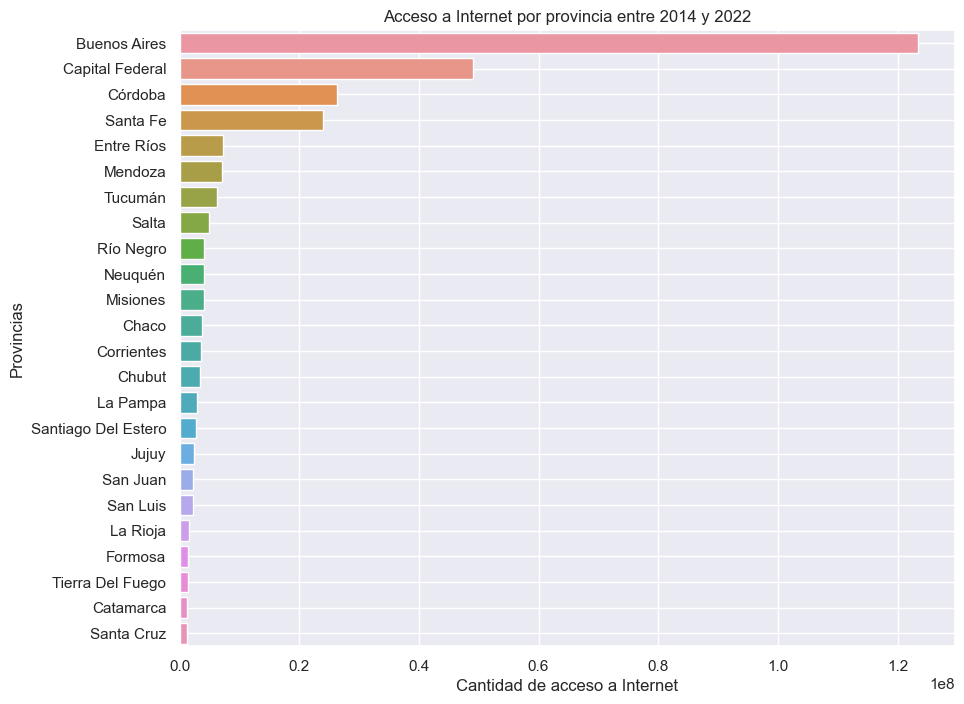

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(data= data, x='Total', y='Provincia')
plt.title('Acceso a Internet por provincia entre 2014 y 2022')
plt.xlabel('Cantidad de acceso a Internet')
plt.grid('True')
plt.ylabel('Provincias')
plt.show()

Muestro en un grafico el progreso de las 5 mejores provincias en función de la cantidad de accesos a Internet

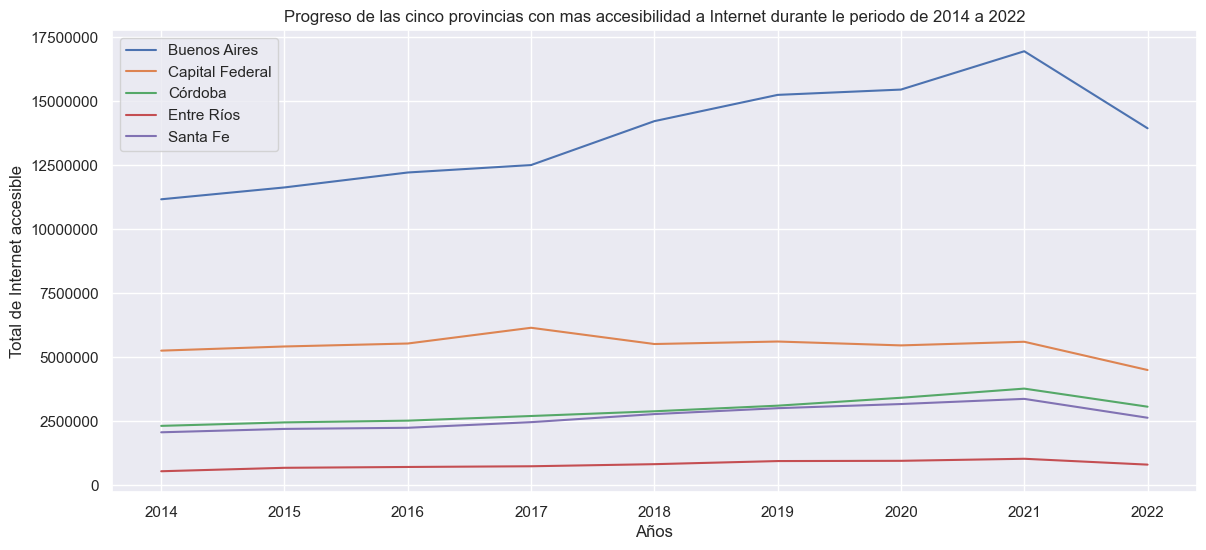

In [105]:
lista = data[:5].Provincia.unique()
d = df.loc[df.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con mas accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

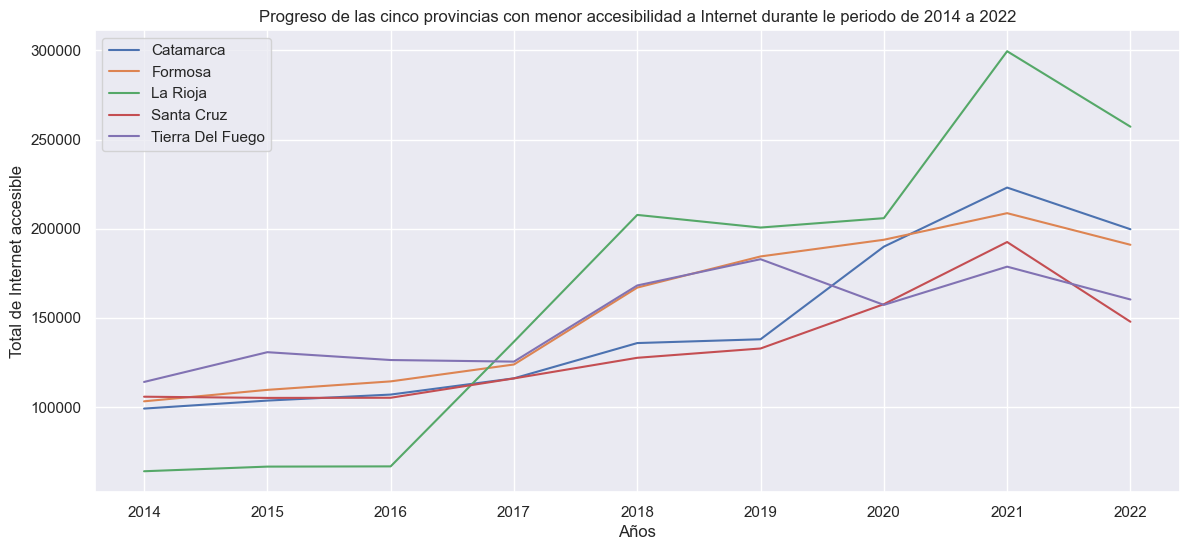

In [106]:
lista = data[-5:].Provincia.unique()
d = df.loc[df.Provincia.isin(lista)].groupby(by=['Provincia','Año']).sum()
plt.figure(figsize=(14,6))
sns.lineplot(data = d, x= 'Año', y='Total', hue='Provincia')
plt.ticklabel_format(style='plain', axis='y') # Pongo el eje 'y' con valores numericos de grandes cifras
plt.grid(True)
plt.legend()
plt.title('Progreso de las cinco provincias con menor accesibilidad a Internet durante le periodo de 2014 a 2022')
plt.xlabel('Años')
plt.ylabel('Total de Internet accesible')
plt.show()

### Dataset *historico_velocidad_internet_provincias.csv*

In [107]:
velocidad_provincias = pd.read_csv('original_datasets/historico_velocidad_internet_provincias.csv')
velocidad_provincias

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,3,NaN,NaN
836,2014,1,Santa Fe,3,NaN,NaN
837,2014,1,Santiago Del Estero,3,NaN,NaN
838,2014,1,Tierra Del Fuego,3,NaN,NaN


In [108]:
velocidad_provincias = velocidad_provincias.drop(columns={'Unnamed: 4','Unnamed: 5'})

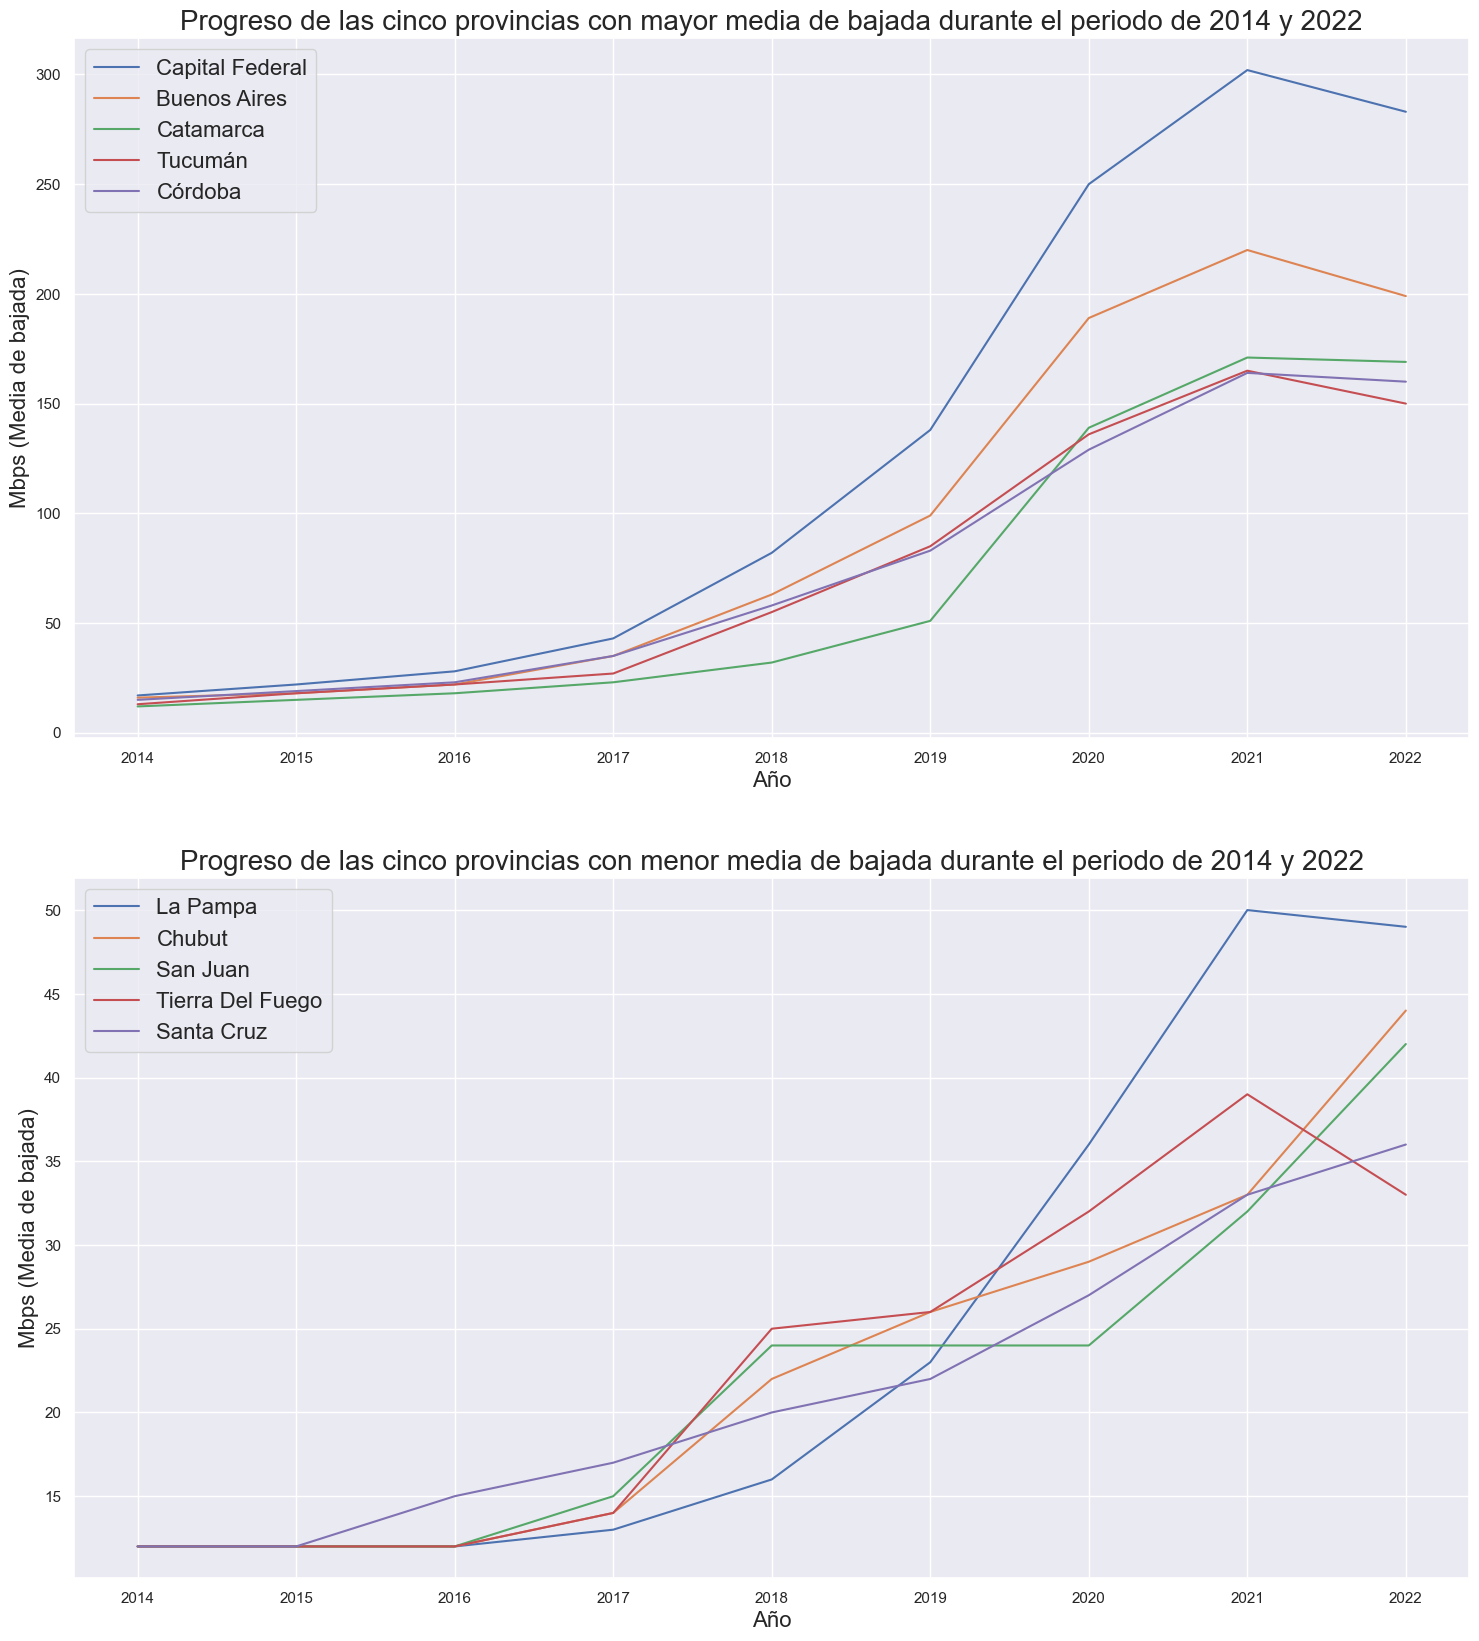

In [109]:
df = velocidad_provincias.groupby(by=['Provincia', 'Año']).sum().reset_index().sort_values(by='Mbps (Media de bajada)', ascending=False)
mejores_provincias = df.loc[df.Provincia.isin(df.Provincia.unique()[:5])]
peores_provincias = df.loc[df.Provincia.isin(df.Provincia.unique()[-5:])]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 20))

sns.lineplot(data=mejores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[0], legend='full')
axes[0].set_title('Progreso de las cinco provincias con mayor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

sns.lineplot(data=peores_provincias, x='Año', y='Mbps (Media de bajada)', hue='Provincia', ax=axes[1], legend='full')
axes[1].set_title('Progreso de las cinco provincias con menor media de bajada durante el periodo de 2014 y 2022', fontsize=20)

# Ajustar tamaño de letra en la leyenda
axes[0].legend(fontsize=16)
axes[0].set_xlabel('Año', fontsize=16)
axes[0].set_ylabel('Mbps (Media de bajada)', fontsize=16)

axes[1].legend(fontsize=16)
axes[1].set_xlabel('Año', fontsize=16)
axes[1].set_ylabel('Mbps (Media de bajada)', fontsize=16)

plt.show()



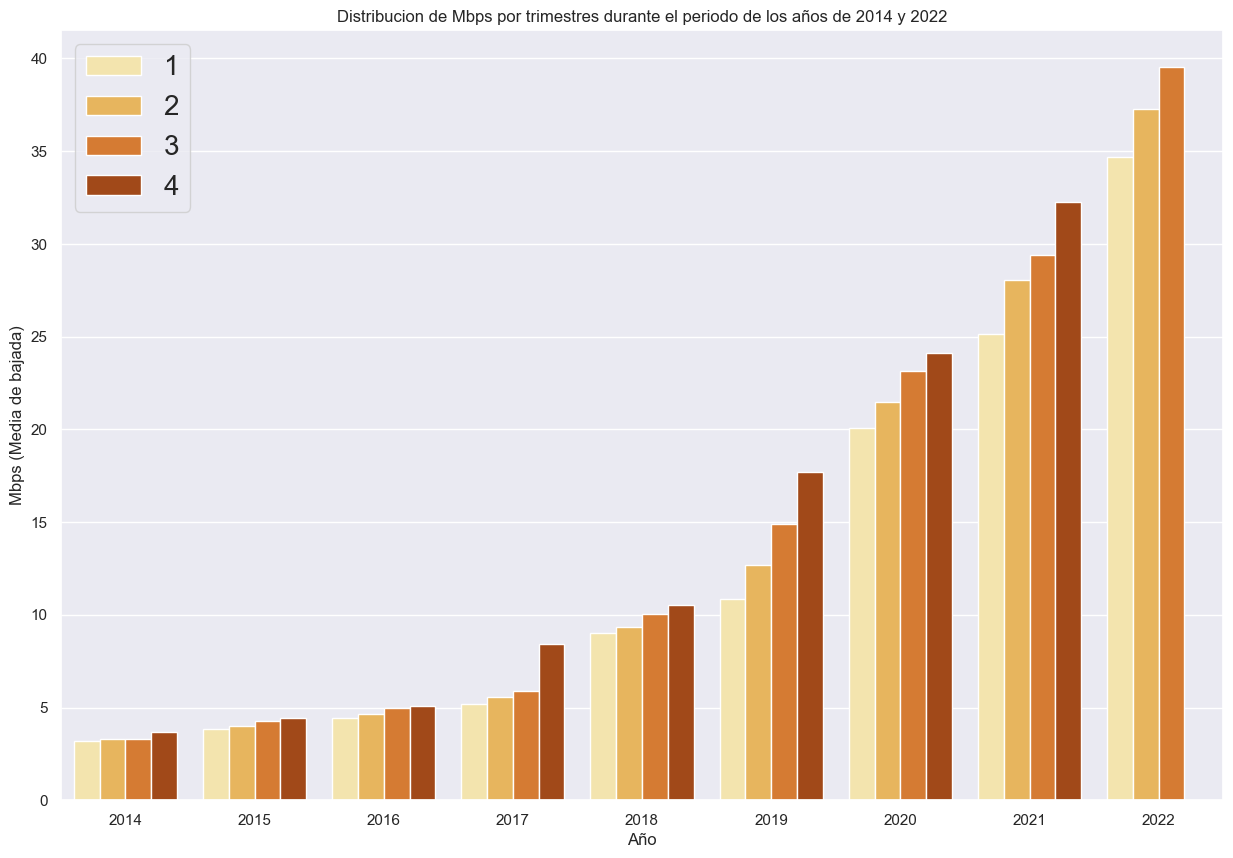

In [110]:
mbps_trimestral = velocidad_provincias.groupby(by=['Año','Trimestre']).mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(data = mbps_trimestral, x='Año', y='Mbps (Media de bajada)',hue = 'Trimestre', palette='YlOrBr')
plt.title('Distribucion de Mbps por trimestres durante el periodo de los años de 2014 y 2022')
plt.legend(fontsize=20)
plt.show()


### Dataset *Internet_Accesos-por-tecnologia_provincias.csv*

In [111]:
acc_tecnologia_provincias = pd.read_csv('original_datasets\Internet_Accesos-por-tecnologia_provincias.csv')
acc_tecnologia_provincias.iloc[-1].Trimestre

'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'

In [112]:
acc_tecnologia_provincias = acc_tecnologia_provincias.drop(acc_tecnologia_provincias.index[-1])
acc_tecnologia_provincias.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [113]:
acc_tecnologia_provincias.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL             object
Cablemodem       object
Fibra óptica     object
Wireless        float64
Otros           float64
Total            object
dtype: object

In [114]:
acc_tecnologia_provincias['ADSL'] = pd.to_numeric(acc_tecnologia_provincias['ADSL'].str.replace('.',''))
acc_tecnologia_provincias['Cablemodem'] = pd.to_numeric(acc_tecnologia_provincias['Cablemodem'].str.replace('.',''))
acc_tecnologia_provincias['Fibra óptica'] = pd.to_numeric(acc_tecnologia_provincias['Fibra óptica'].str.replace('.',''))
acc_tecnologia_provincias['Total'] = pd.to_numeric(acc_tecnologia_provincias['Total'].str.replace('.',''))

In [115]:
adsl = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='ADSL', ascending=False)
cablemodem = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Cablemodem', ascending=False)
fibra_optica = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Fibra óptica', ascending=False)
Wireless = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Wireless', ascending=False)
otros = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Otros', ascending=False)
total = acc_tecnologia_provincias.groupby(by=['Provincia']).sum().reset_index().sort_values(by='Total', ascending=False)

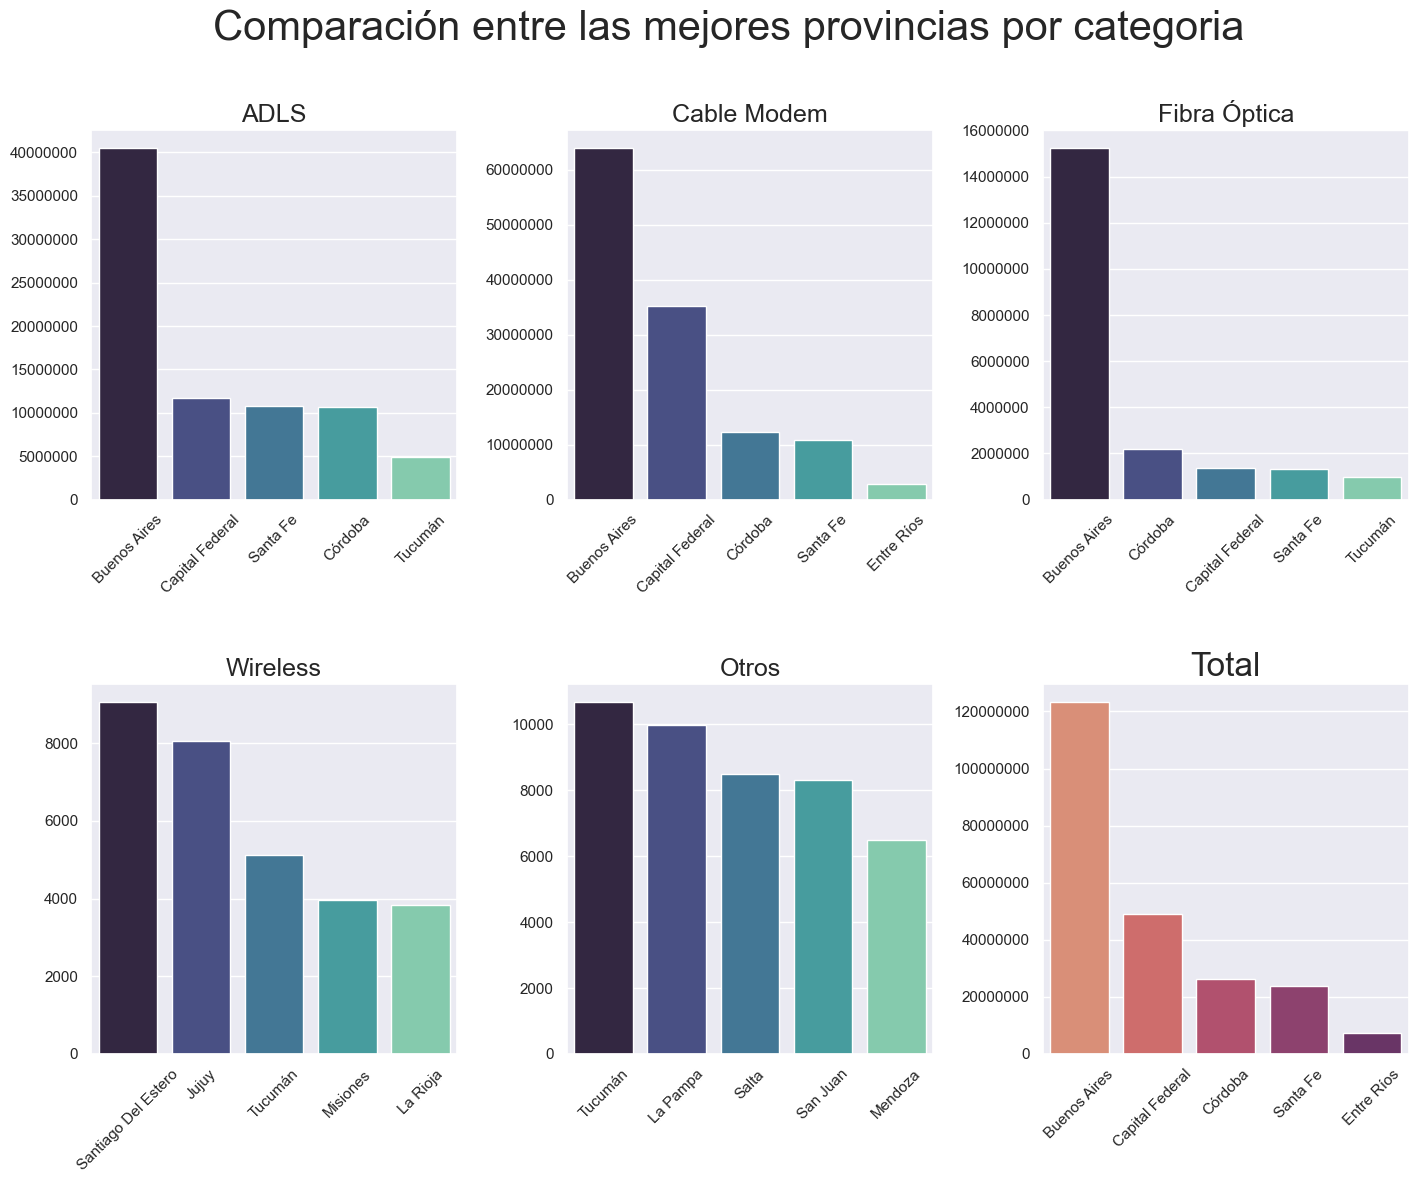

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12))
# ADLS
sns.barplot(data=adsl[:5], x='Provincia', y='ADSL', ax=axes[0,0], palette="mako")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[:5], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="mako")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[:5], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="mako")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[:5], x='Provincia', y='Wireless',ax=axes[1,0], palette="mako")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[:5], x='Provincia', y='Otros',ax=axes[1,1], palette="mako")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[:5], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las mejores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

#### Ahora quiero realizar el mismo grafico que arriba pero con las provincias con menor acceso por cada categoria de telecomunicación

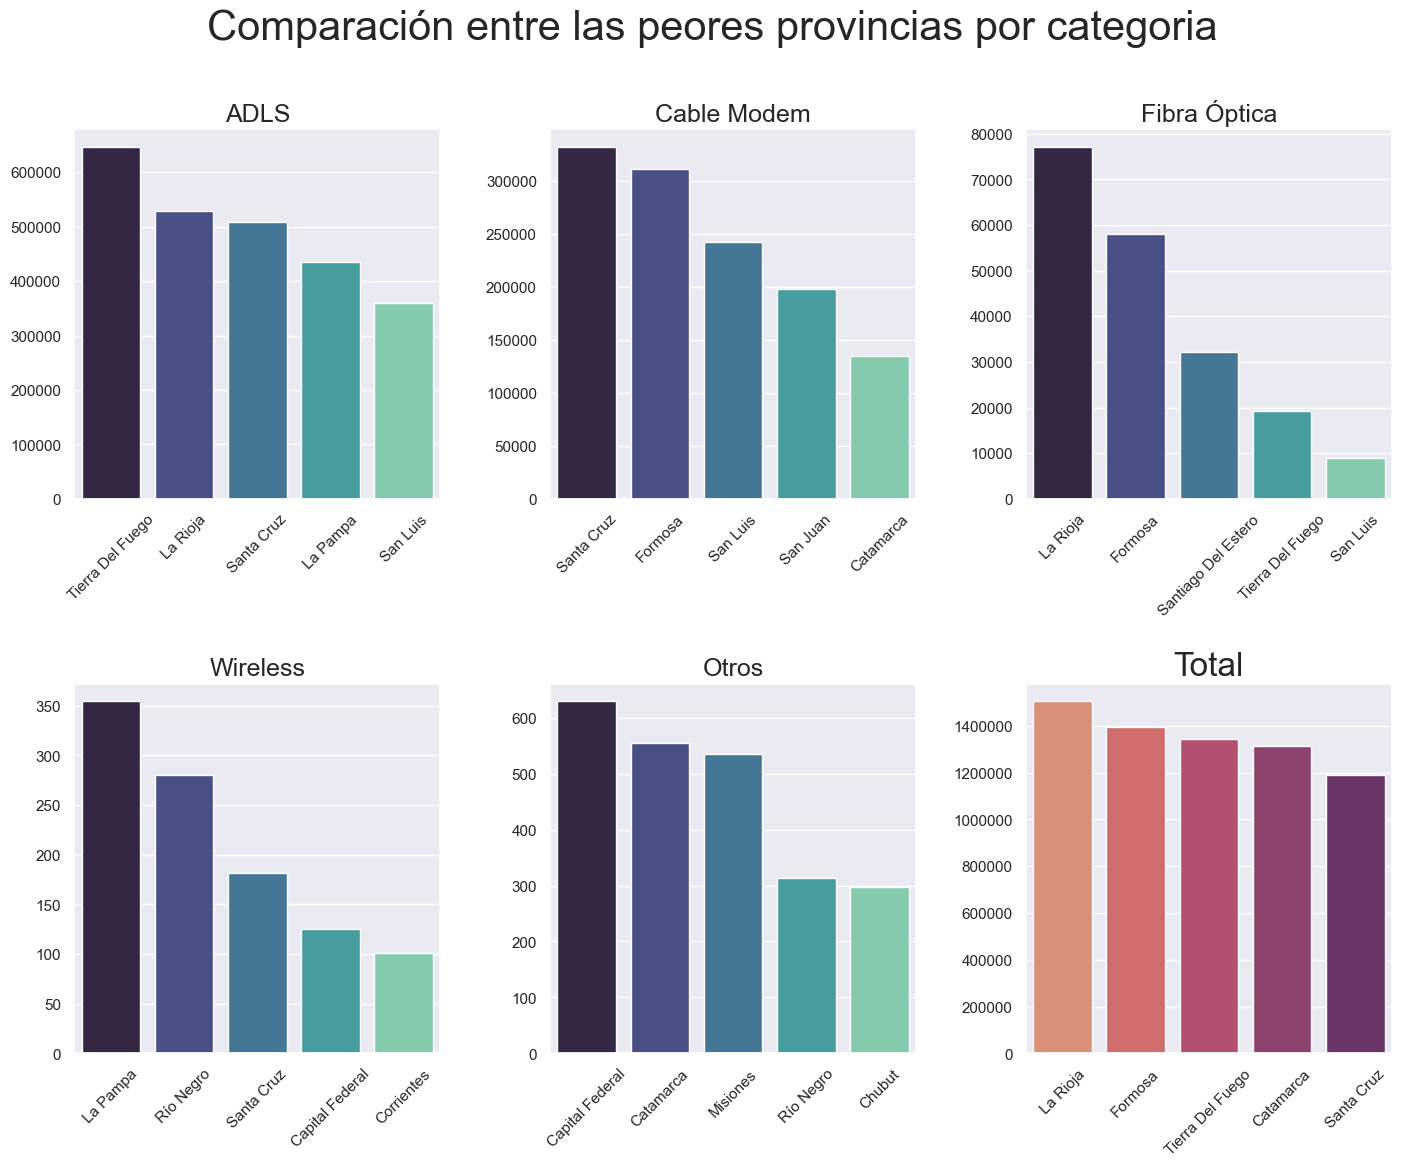

In [117]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(17,12))
# ADLS
sns.barplot(data=adsl[-5:], x='Provincia', y='ADSL', ax=axes[0,0], palette="mako")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_title('ADLS', fontsize=18)
axes[0,0].set_ylabel('')
axes[0, 0].set_xlabel('')

# Cablemodem
sns.barplot(data=cablemodem[-5:], x='Provincia', y='Cablemodem', ax=axes[0, 1], palette="mako")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')
axes[0, 1].set_title('Cable Modem', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# Fibra Óptica
sns.barplot(data=fibra_optica[-5:], x='Provincia', y='Fibra óptica',ax=axes[0,2], palette="mako")
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].ticklabel_format(style='plain', axis='y')
axes[0, 2].set_title('Fibra Óptica', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# Wireless
sns.barplot(data=Wireless[-5:], x='Provincia', y='Wireless',ax=axes[1,0], palette="mako")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')
axes[1, 0].set_title('Wireless', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# Otros
sns.barplot(data=otros[-5:], x='Provincia', y='Otros',ax=axes[1,1], palette="mako")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')
axes[1, 1].set_title('Otros', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# Total
sns.barplot(data=total[-5:], x='Provincia', y='Total',ax=axes[1, 2], palette="flare")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=45)
axes[1, 2].ticklabel_format(style='plain', axis='y')
axes[1, 2].set_title('Total', fontsize=24)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')


fig.suptitle('Comparación entre las peores provincias por categoria', fontsize=30)
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Para agregar mas separación entre los subplots

### Datasets *Internet_Penetracion_hogares.csv*

Convierto las columnas en valores numericos

In [118]:
internet_hogares = pd.read_csv('original_datasets/Internet_Penetracion_hogares.csv')
internet_hogares['Accesos por cada 100 hab'] = pd.to_numeric(internet_hogares['Accesos por cada 100 hab'].str.replace(',','.'))
internet_hogares['Accesos por cada 100 hogares'] = pd.to_numeric(internet_hogares['Accesos por cada 100 hogares'].str.replace(',','.'))

In [119]:
data = internet_hogares.groupby(by=['Año','Trimestre']).mean().reset_index()

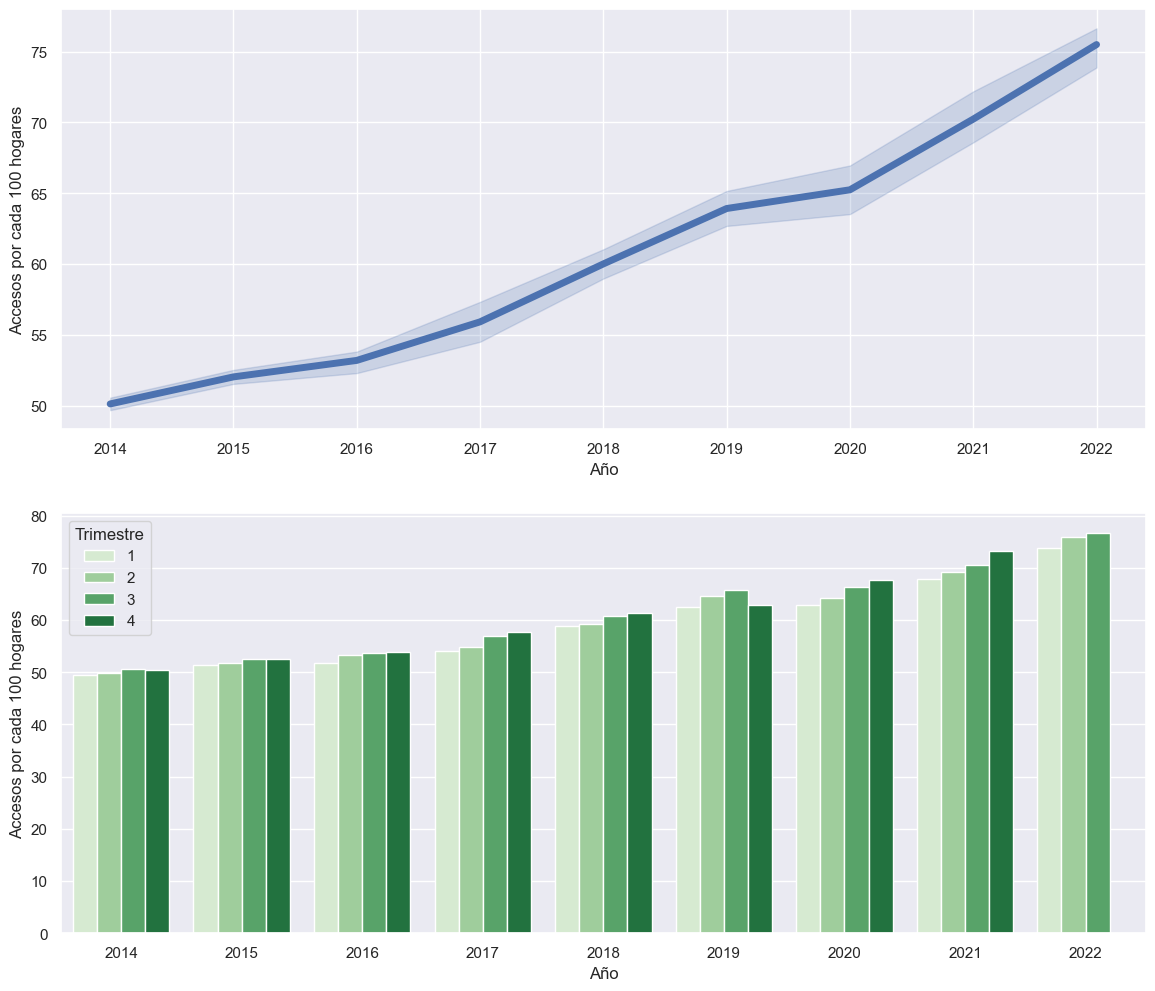

In [120]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,12))
sns.lineplot(data = data, x='Año', y='Accesos por cada 100 hogares', ax=ax[0], linewidth=5, linestyle='-')
ax[0].grid(True)

sns.barplot(data = data, x='Año', y='Accesos por cada 100 hogares',hue='Trimestre', ax=ax[1], palette='Greens')
plt.show()

<AxesSubplot: xlabel='Año', ylabel='Accesos por cada 100 hab'>

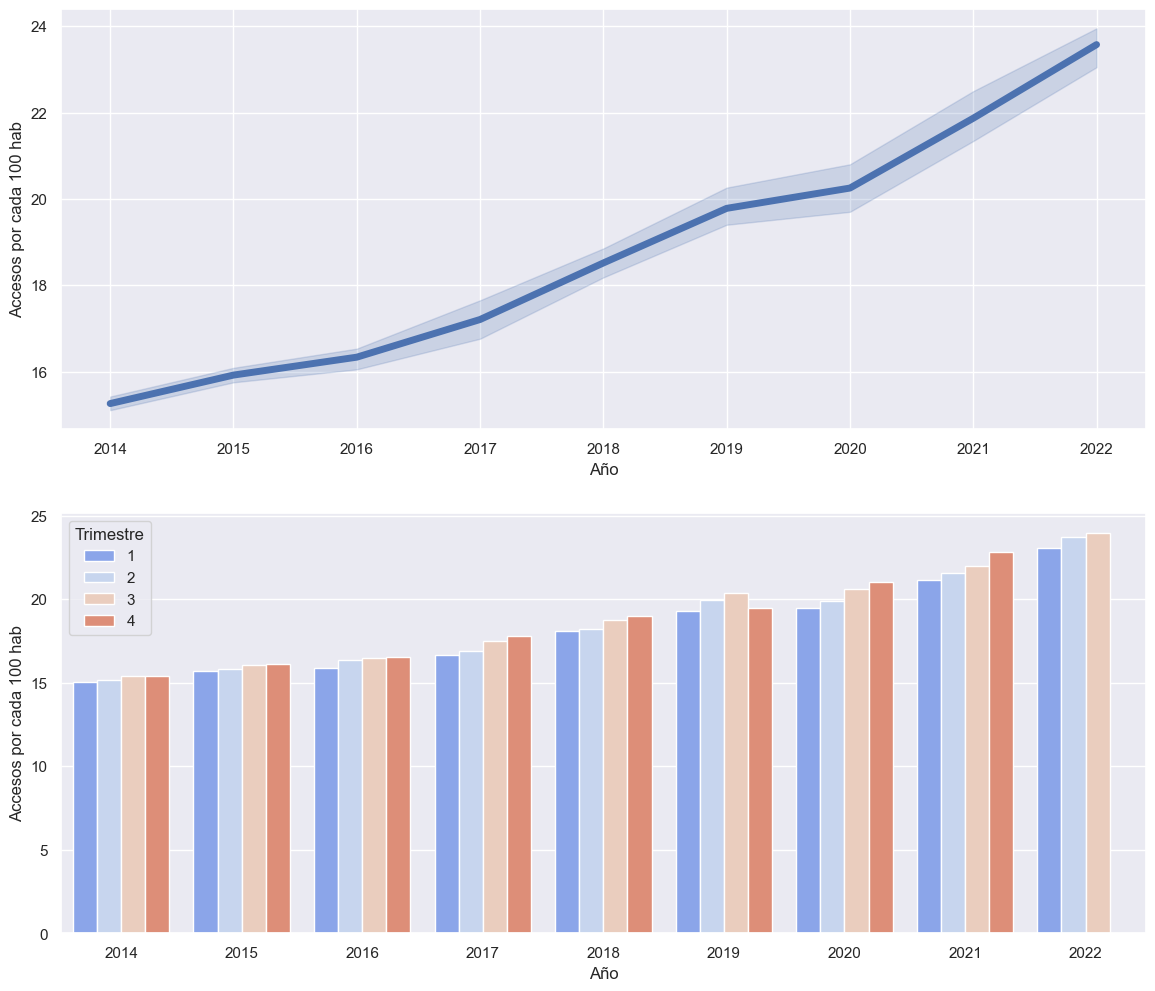

In [121]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,12))
sns.lineplot(data = data, x='Año', y='Accesos por cada 100 hab', ax=ax[0], linewidth=5, linestyle='-')
ax[0].grid(True)

sns.barplot(data = data, x='Año', y='Accesos por cada 100 hab',hue='Trimestre', ax=ax[1], palette='coolwarm')

In [122]:
data.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2014,1,49.55,15.05
1,2014,2,49.86,15.16
2,2014,3,50.67,15.43
3,2014,4,50.50,15.39
4,2015,1,51.36,15.68


In [123]:
data.groupby(by='Año').mean()

,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
Año,,,
2014,2.5,50.145000,15.257500
2015,2.5,52.052500,15.917500
2016,2.5,53.215000,16.332500
2017,2.5,55.935000,17.205000
2018,2.5,60.022500,18.515000
2019,2.5,63.930000,19.780000
2020,2.5,65.250000,20.250000
2021,2.5,70.237500,21.867500
2022,2.0,75.496667,23.573333


<AxesSubplot: xlabel='Año', ylabel='Accesos por cada 100 hab'>

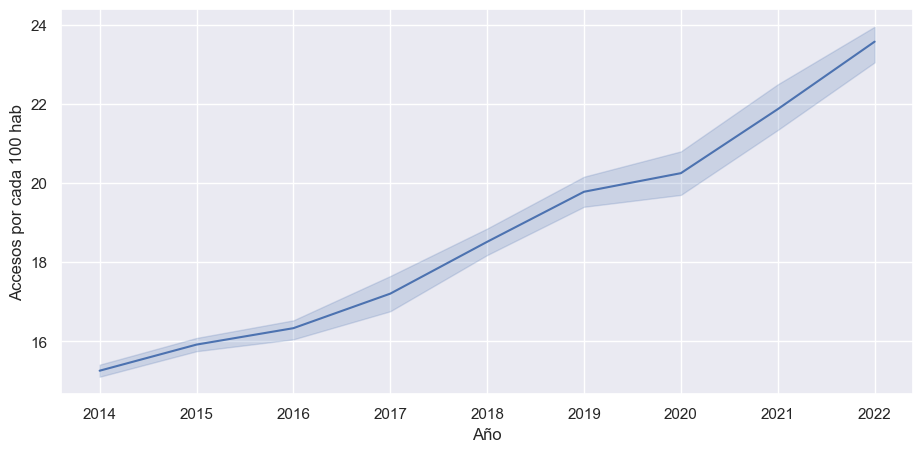

In [124]:
plt.figure(figsize=(11,5))
sns.lineplot(data = data, x='Año',y='Accesos por cada 100 hab')

In [125]:
internet_velocidad = pd.read_csv('original_datasets/Internet_Accesos-por-velocidad.csv')
internet_velocidad.drop(columns={'Unnamed: 11'},inplace=True)

In [126]:
internet_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794
4,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541


In [127]:
for column in internet_velocidad:
    internet_velocidad[column] = pd.to_numeric(internet_velocidad[column].astype(str).str.replace('.',''))

In [128]:
internet_velocidad.dtypes

Año                        int64
Trimestre                  int64
Hasta 512 kbps             int64
Entre 512 Kbps y 1 Mbps    int64
Entre 1 Mbps y 6 Mbps      int64
Entre 6 Mbps y 10 Mbps     int64
Entre 10 Mbps y 20 Mbps    int64
Entre 20 Mbps y 30 Mbps    int64
Más de 30 Mbps             int64
OTROS                      int64
Total                      int64
dtype: object

In [129]:
internet_velocidad_prov = pd.read_csv('original_datasets/Internet_Accesos-por-velocidad_provincias.csv')
columns = ['HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total']

for column in columns:
    internet_velocidad_prov[column] = pd.to_numeric(internet_velocidad_prov[column].fillna(0).astype(str).str.replace('.',''))

In [130]:
internet_velocidad_prov.dtypes

Año                     int64
Trimestre               int64
Provincia              object
HASTA 512 kbps          int64
+ 512 Kbps - 1 Mbps     int64
+ 1 Mbps - 6 Mbps       int64
+ 6 Mbps - 10 Mbps      int64
+ 10 Mbps - 20 Mbps     int64
+ 20 Mbps - 30 Mbps     int64
+ 30 Mbps               int64
OTROS                   int64
Total                   int64
dtype: object

In [153]:
data_internet = internet_velocidad.groupby(by='Año').mean().reset_index()
data_internet.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2014,2.5,35391.50,626698.50,5129465.25,375123.50,176784.25,1425.25,12876.75,0.00,6366186.75
1,2015,2.5,29906.75,475066.25,5099324.00,661246.75,489822.25,12089.25,19430.75,0.00,6794767.75
2,2016,2.5,28816.00,238128.25,4873064.75,866906.00,846160.50,98931.75,30503.00,0.00,7073592.50
3,2017,2.5,19270.50,223099.00,4208996.00,1008415.75,1448661.00,356924.50,182493.50,38786.25,7486646.50
4,2018,2.5,8207.50,214164.50,3332212.75,924543.25,1763424.25,1280621.50,491681.00,195975.50,8242046.75


In [160]:
subpots_axes = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2]]
i = subpots_axes[1]
print(i)

[0, 1]


In [164]:
columns = ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']

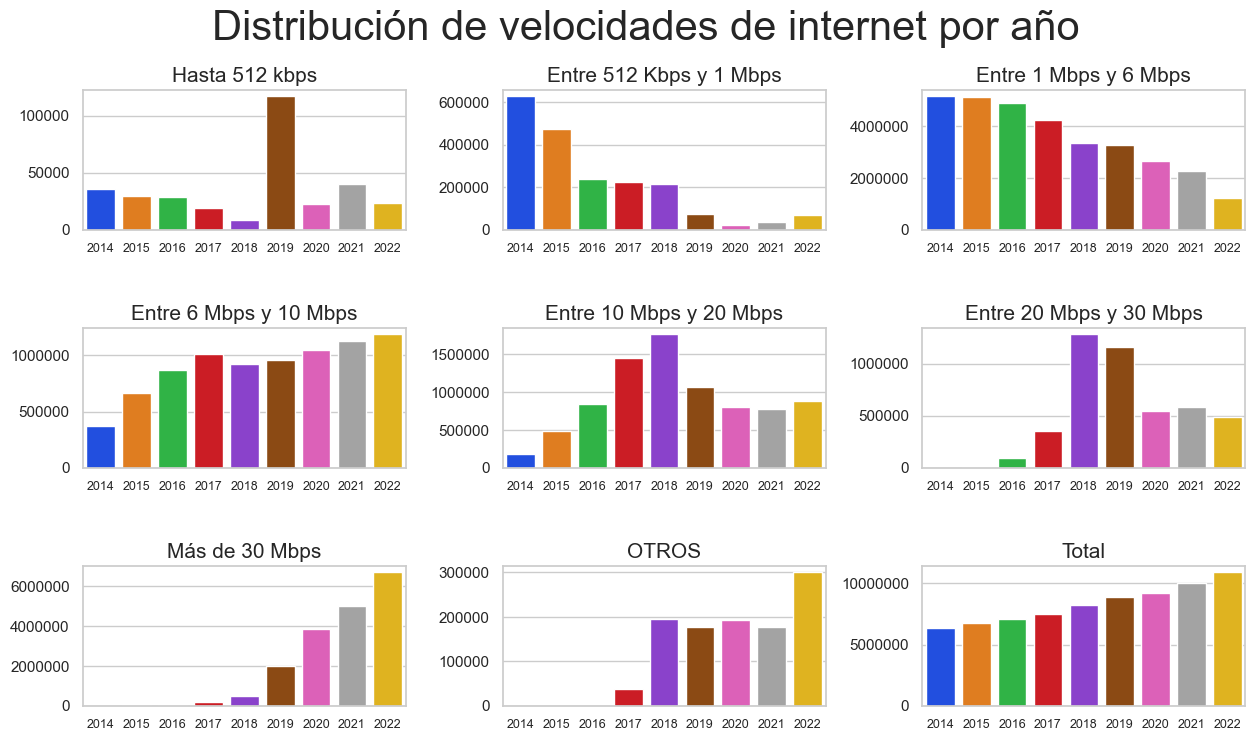

In [191]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,8))
#subpots_axes = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2]]

for index, ax in enumerate(axes.flatten()):
    sns.barplot(data = data_internet, x='Año', y=columns[index], ax=ax, palette='bright')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=9)
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_title(columns[index], fontsize=15)
    ax.set_ylabel('')
    ax.set_xlabel('')

fig.suptitle('Distribución de velocidades de internet por año', fontsize=30)
fig.subplots_adjust(hspace=0.7, wspace=0.3) # Para agregar mas separación entre los subplots


In [209]:
data_internet

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2014,2.5,35391.500000,626698.50,5129465.25,375123.50,176784.25,1.425250e+03,1.287675e+04,0.00,6.366187e+06
1,2015,2.5,29906.750000,475066.25,5099324.00,661246.75,489822.25,1.208925e+04,1.943075e+04,0.00,6.794768e+06
2,2016,2.5,28816.000000,238128.25,4873064.75,866906.00,846160.50,9.893175e+04,3.050300e+04,0.00,7.073592e+06
3,2017,2.5,19270.500000,223099.00,4208996.00,1008415.75,1448661.00,3.569245e+05,1.824935e+05,38786.25,7.486646e+06
4,2018,2.5,8207.500000,214164.50,3332212.75,924543.25,1763424.25,1.280622e+06,4.916810e+05,195975.50,8.242047e+06
5,2019,2.5,116709.250000,72200.25,3243665.25,956741.25,1073116.25,1.160052e+06,1.990550e+06,176288.25,8.891545e+06
6,2020,2.5,22570.500000,24169.00,2640485.75,1047253.25,802047.50,5.441832e+05,3.876270e+06,193774.75,9.192811e+06
7,2021,2.5,40273.750000,38414.00,2272046.25,1123526.50,779467.00,5.845108e+05,5.005438e+06,177921.50,1.002160e+07
8,2022,2.0,23389.666667,68903.00,1205911.00,1186028.00,882525.00,4.916577e+05,6.691286e+06,299654.00,1.089127e+07


In [267]:
# Año para el que deseas mostrar las velocidades
def velocidades_por_año(año):
    # Filtrar los datos para el año seleccionado
    data_internet_año = data_internet[data_internet.Año == año]

    # Convertir las columnas de velocidades de Internet en una sola columna
    data_internet_melted = pd.melt(data_internet_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

    plt.figure(figsize=(15,5.5))

    # Graficar el barplot con todas las velocidades del año seleccionado
    sns.barplot(data=data_internet_melted, y='Velocidad', x='Cantidad')

    # Configuración adicional
    plt.ylabel('Velocidad', fontsize=20)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel('Cantidad', fontsize=20)
    plt.title(f'Velocidades de Internet - Año {año}', fontsize=26)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=14)


    # Mostrar el gráfico
    plt.show()

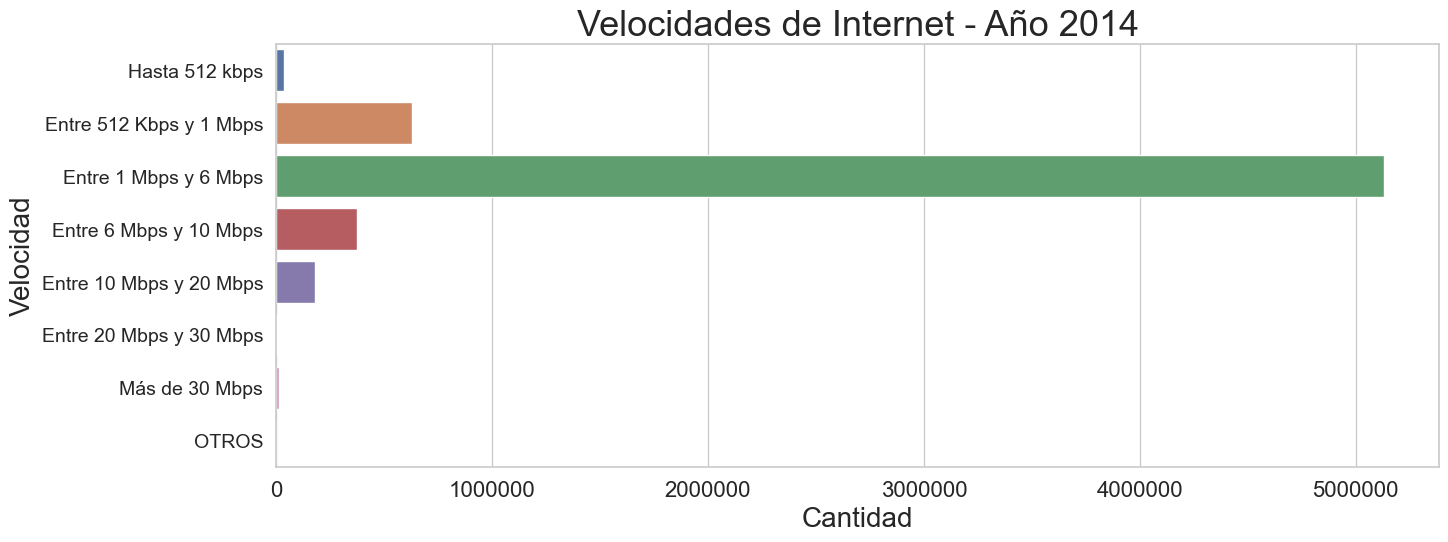

In [268]:
velocidades_por_año(2014)

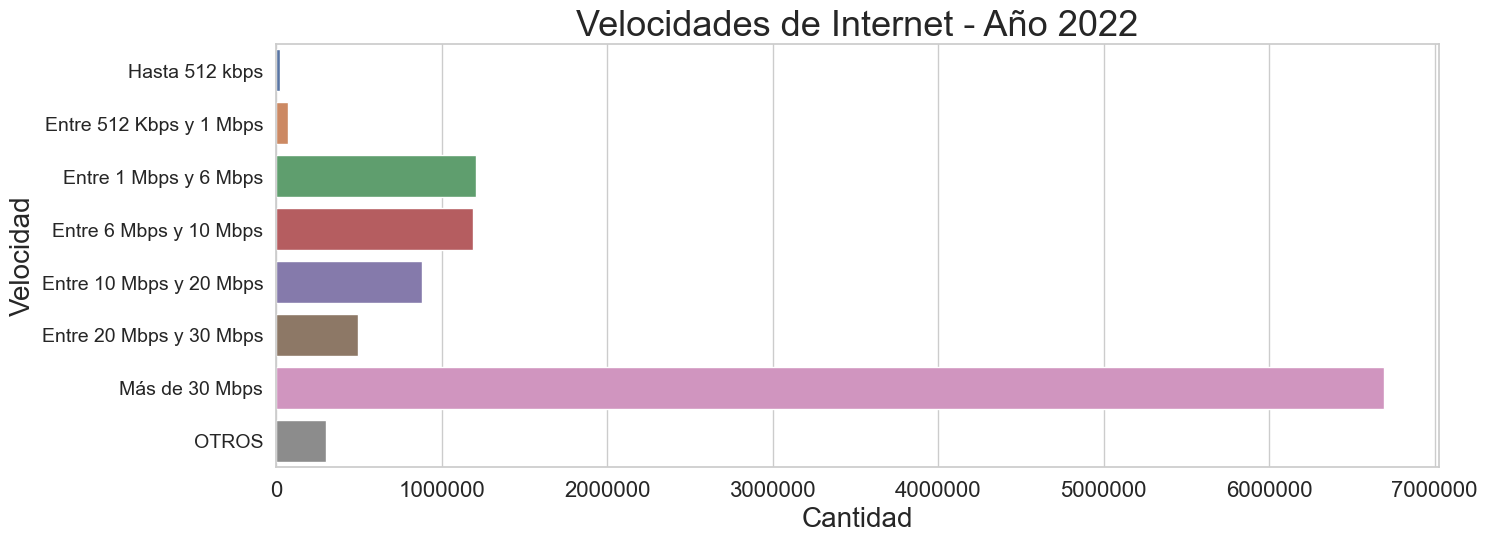

In [269]:
velocidades_por_año(2022)

Quiero comparar como fue el avanze de las velocidades durante el perdiodo de los 9 años, comparando en un mimso grafico las velocidades del año 2014 con las del 2022

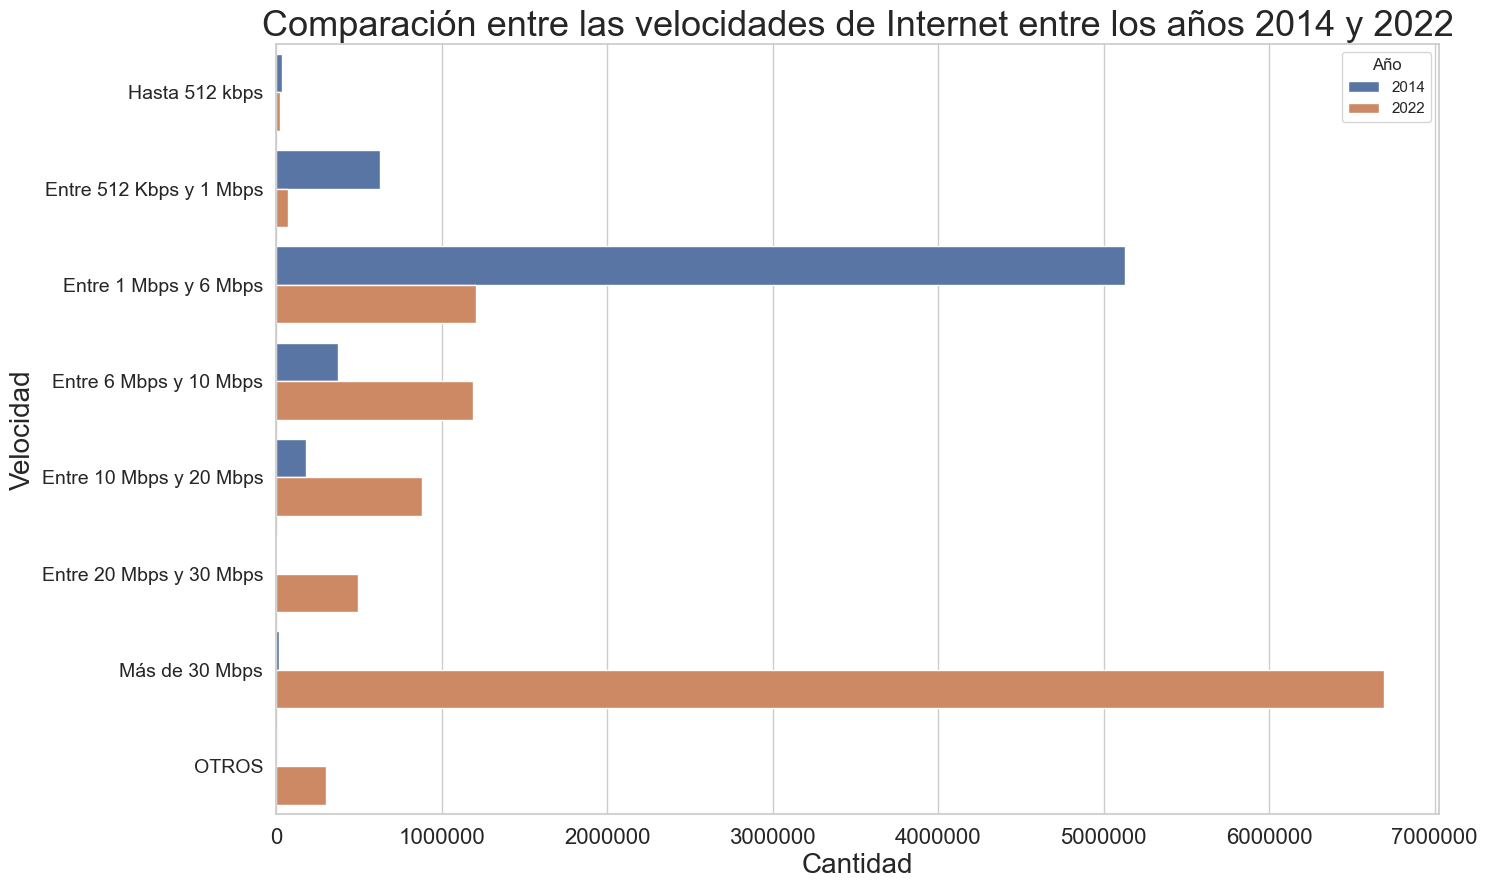

In [274]:
data_internet_año = data_internet[(data_internet.Año == 2014) | (data_internet.Año == 2022)]

# Convertir las columnas de velocidades de Internet en una sola columna
data_internet_melted = pd.melt(data_internet_año, id_vars=['Año', 'Trimestre','Total'], var_name='Velocidad', value_name='Cantidad')

plt.figure(figsize=(15,10))

# Graficar el barplot con todas las velocidades del año seleccionado
sns.barplot(data=data_internet_melted, y='Velocidad', x='Cantidad', hue='Año')

# Configuración adicional
plt.ylabel('Velocidad', fontsize=20)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Cantidad', fontsize=20)
plt.title(f'Comparación entre las velocidades de Internet entre los años 2014 y 2022', fontsize=26)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)


# Mostrar el gráfico
plt.show()

Este grafico muestre el progreso que habo en la Republica Argentina en el ambito de las velocidades del Internet

Hago uan compración de los años en varios subplots

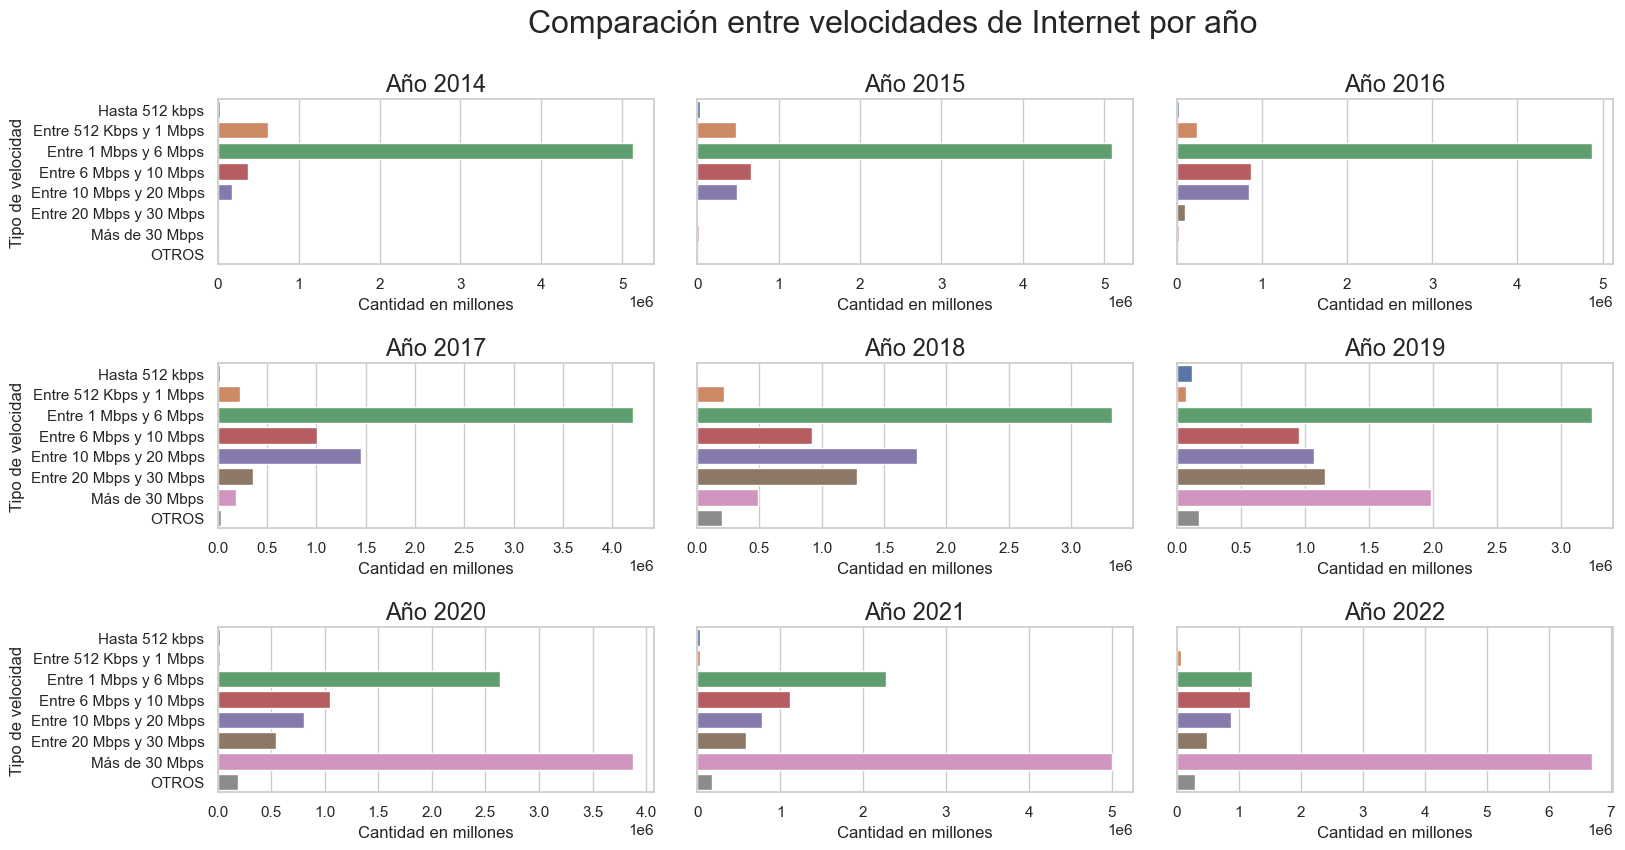

In [251]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,9))
años = data_internet.Año.unique()
for index, ax in enumerate(axes.flatten()):
    data_internet_año = data_internet[data_internet.Año == años[index]]
    data_internet_melted = pd.melt(data_internet_año, id_vars=['Año', 'Trimestre','Total'], var_name='Tipo de velocidad', value_name='Cantidad en millones')
    sns.barplot(data = data_internet_melted, x='Cantidad en millones', y='Tipo de velocidad', ax=ax)
    if ax not in [axes[0, 0], axes[1, 0], axes[2, 0]]:
        ax.set_ylabel("")
        ax.set_yticks([])
    #if ax not in [axes[2, 0], axes[2, 1], axes[2, 2]]:
        #ax.set_xlabel('')
    ax.set_title(f'Año {años[index]}', fontsize=17)

plt.suptitle('Comparación entre velocidades de Internet por año', fontsize=23)
plt.subplots_adjust(hspace=0.6, wspace=0.1)


---

### Dataset *Internet_BAF.csv*

Dial up = conexión por línea conmutada

In [4]:
internet_baf = pd.read_csv('original_datasets/Internet_BAF.csv')
internet_baf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [6]:
internet_baf.dtypes

Año                   int64
Trimestre             int64
Banda ancha fija     object
Dial up             float64
Total                object
Periodo              object
dtype: object

In [10]:
columns = ['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total']
for c in columns:
    internet_baf[c] = pd.to_numeric(internet_baf[c].astype(str).str.replace('.',''))

In [11]:
internet_baf.dtypes

Año                  int64
Trimestre            int64
Banda ancha fija     int64
Dial up              int64
Total                int64
Periodo             object
dtype: object

In [19]:
data_internet_baf = internet_baf.groupby(by='Año').mean().reset_index()
data_internet_baf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total
0,2014,2.5,6477218.25,28774.75,6514158.25
1,2015,2.5,6834387.25,34067.50,6868454.75
2,2016,2.5,7093444.00,24133.25,7124014.50
3,2017,2.5,7554455.00,15375.00,7582670.75
4,2018,2.5,8216394.50,25652.25,8242046.75


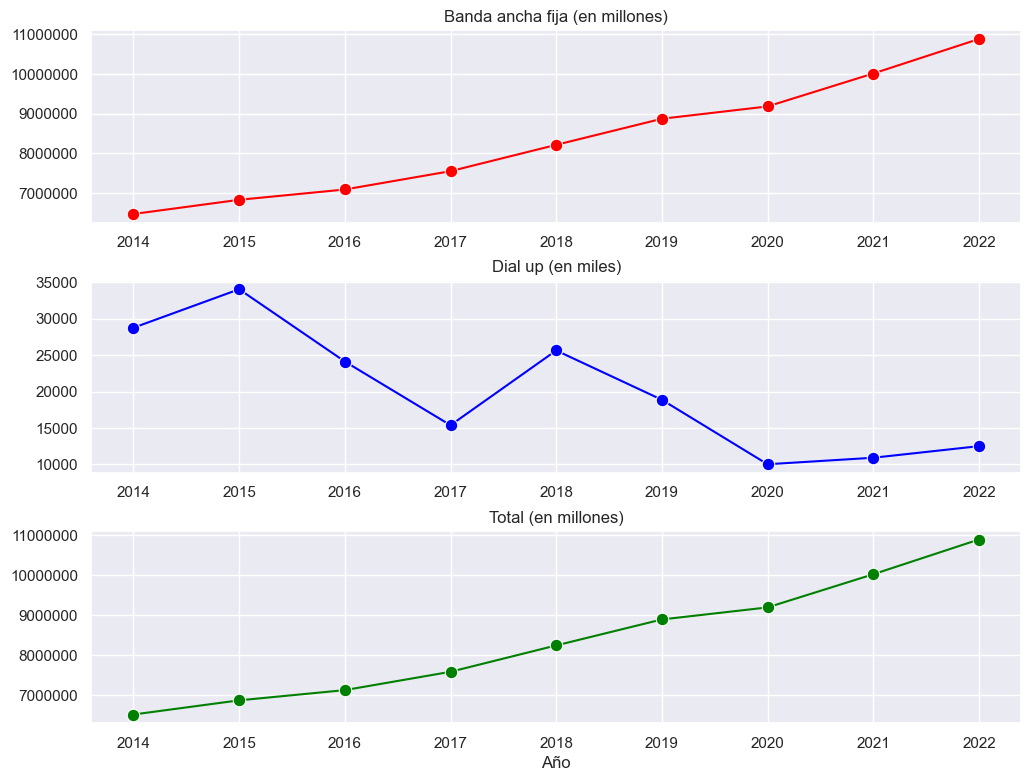

In [71]:
fig , axes = plt.subplots(nrows=3, ncols=1, figsize=(12,9))

sns.lineplot(data = data_internet_baf, x='Año', y='Banda ancha fija', ax=axes[0], marker='o', markersize=9, color='red', linewidth=1.5)
axes[0].set_ylabel('')
axes[0].set_xlabel('')
axes[0].set_title('Banda ancha fija (en millones)')
axes[0].ticklabel_format(style='plain', axis='y')


sns.lineplot(data = data_internet_baf, x='Año', y='Dial up', ax=axes[1], marker='o', markersize=9, color='blue', linewidth=1.5)
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_title('Dial up (en miles)')
axes[1].ticklabel_format(style='plain', axis='y')


sns.lineplot(data = data_internet_baf, x='Año', y='Total', ax=axes[2], marker='o', markersize=9, color='green', linewidth=1.5)
axes[2].set_ylabel('')
axes[2].set_title('Total (en millones)')
axes[2].ticklabel_format(style='plain', axis='y')

plt.subplots_adjust(hspace=0.3)
plt.show()

Acá se ve que la tecnologia de Dial up, es su mejor momento en el pais tuvo un maximo de 35000 accesos en el año 2015. Visualizando el grafico de Banda ancha fija en este año, se ve que su valor es el segundo minimo de todos los años pero que aun asi supera en grandes cantidades al Dial up, casi con unos siete millones de banda ancha fija brindado como servicio

### Dataset *internet_fijo_tecnologia_localidades.csv*

In [73]:
internet_fijo_tech_localidades = pd.read_csv('original_datasets\internet_fijo_tecnologia_localidades.csv')
internet_fijo_tech_localidades.drop(columns={'Unnamed: 13'}, inplace=True)

In [76]:
internet_fijo_tech_localidades.dtypes

Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL             object
CABLEMODEM       object
DIAL UP          object
FIBRA OPTICA     object
OTROS            object
SATELITAL        object
WIMAX            object
WIRELESS         object
Total general    object
dtype: object

In [77]:
columns = ['ADSL', 'CABLEMODEM',
       'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS',
       'Total general']

for c in columns:
    internet_fijo_tech_localidades[c] = pd.to_numeric(internet_fijo_tech_localidades[c].astype(str).str.replace('.','').replace('- 0','0'))

In [78]:
internet_fijo_tech_localidades.dtypes

Provincia        object
Partido          object
Localidad        object
Link Indec       object
ADSL              int64
CABLEMODEM        int64
DIAL UP           int64
FIBRA OPTICA      int64
OTROS             int64
SATELITAL         int64
WIMAX             int64
WIRELESS          int64
Total general     int64
dtype: object

In [89]:
internet_fijo_tech_localidades.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


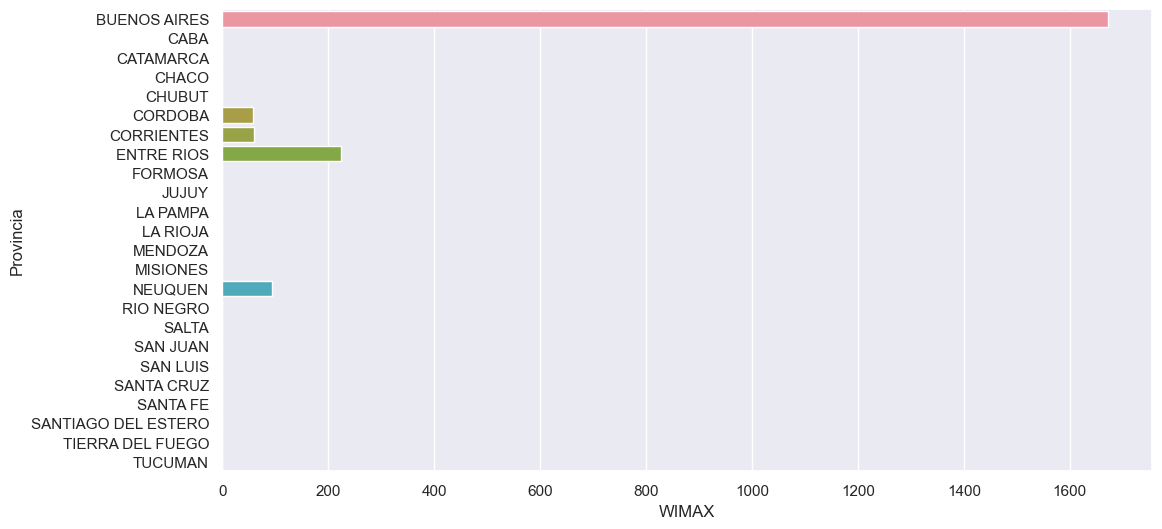

In [138]:
data = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = data, x='WIMAX',y='Provincia')
plt.show()

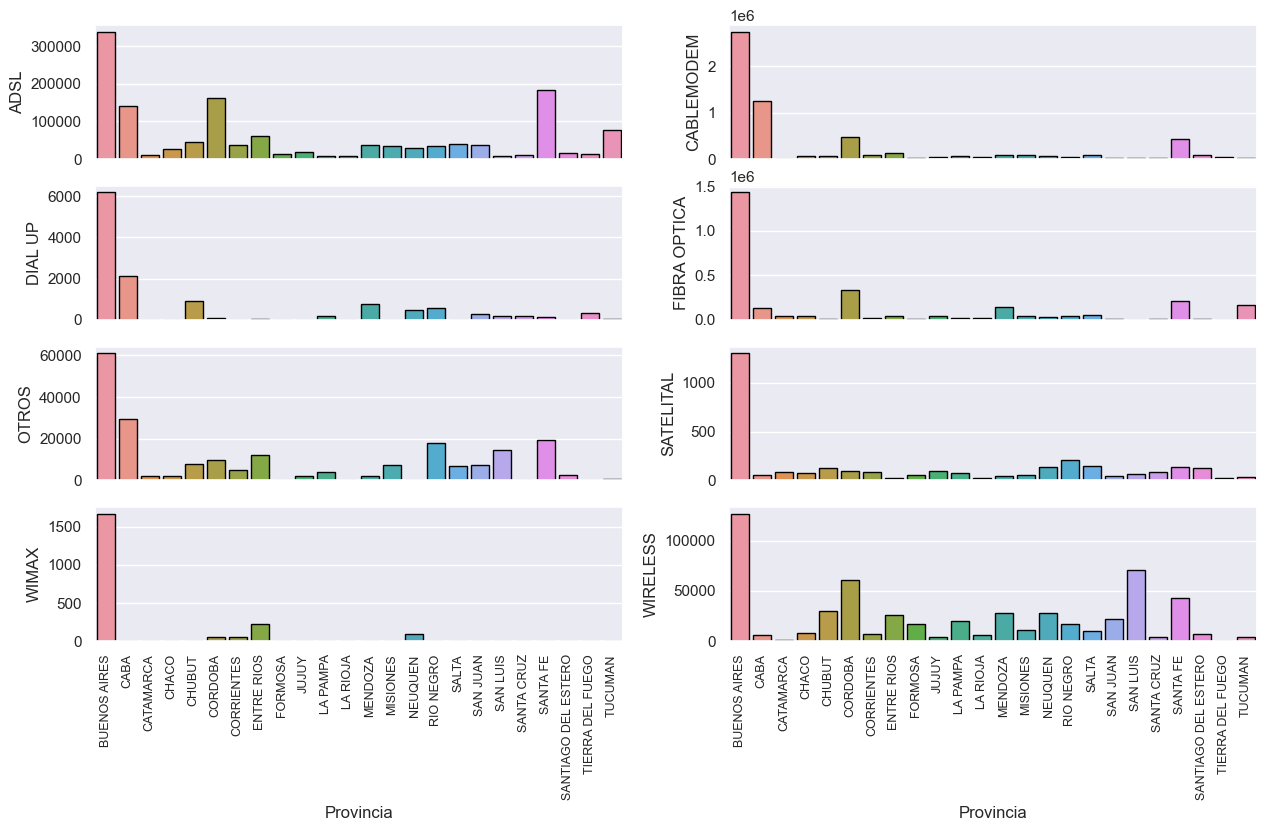

In [157]:
data = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()

fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(15,8))
for index, ax in enumerate(axes.flatten()):
    sns.barplot(data = data, y=columns[index], x='Provincia', ax=ax, edgecolor='black')
    if ax not in [axes[3, 0], axes[3, 1]]:
        ax.set_xlabel("")
        ax.set_xticks([])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)



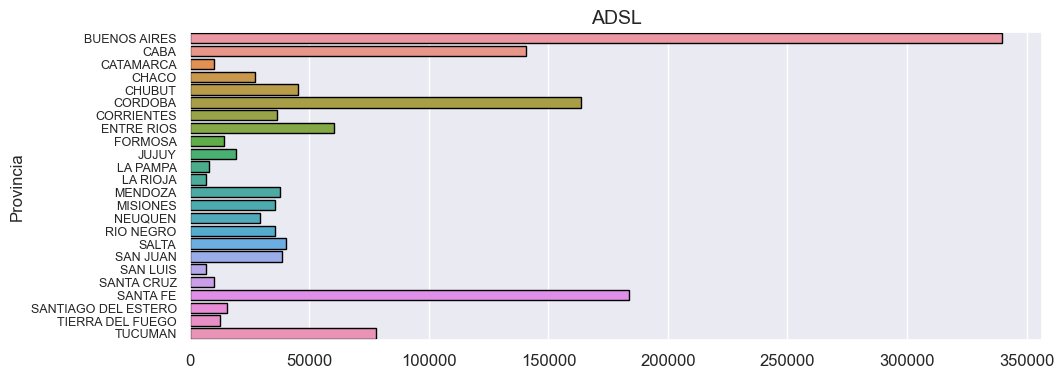

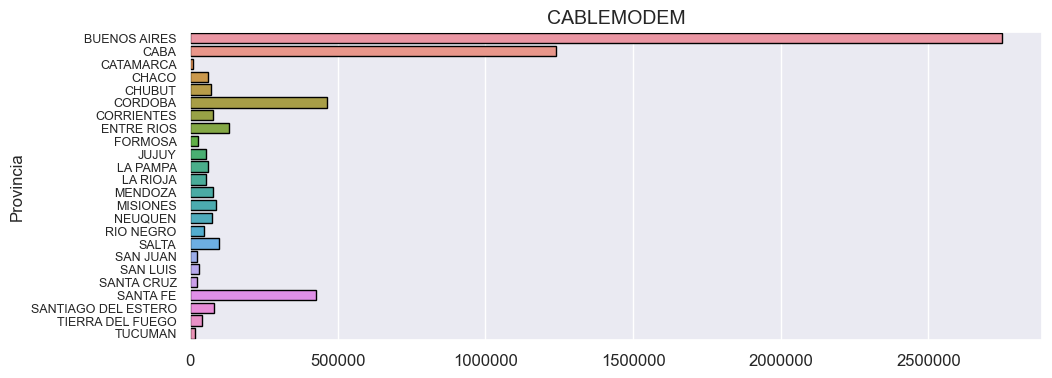

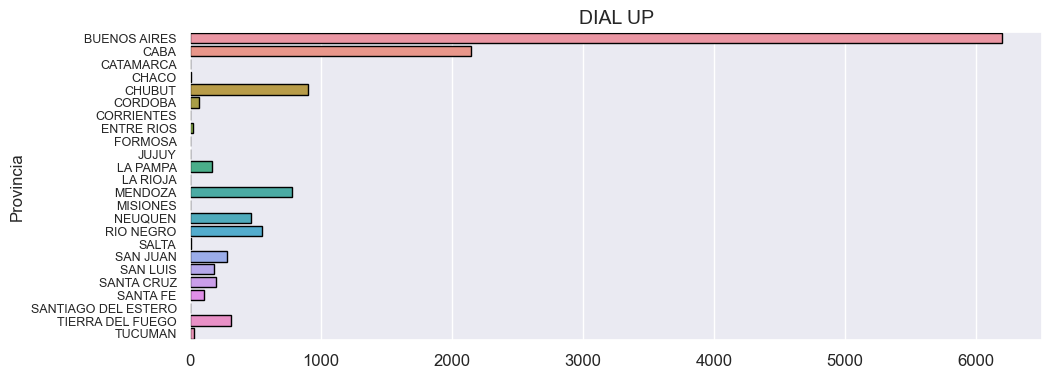

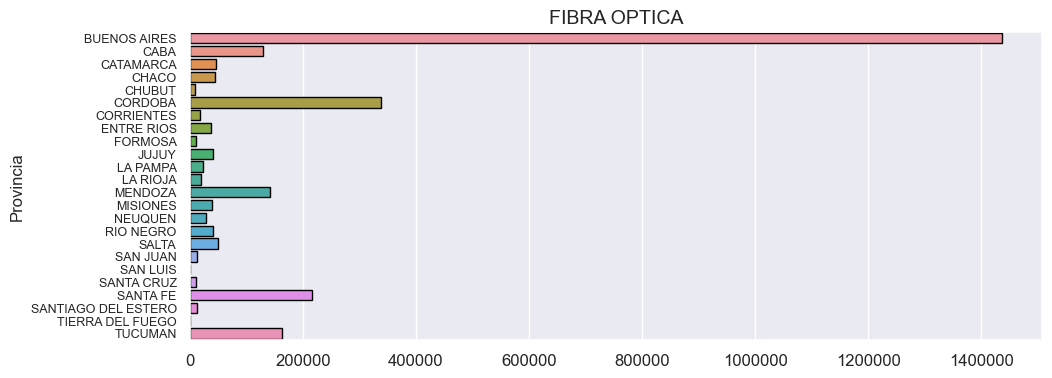

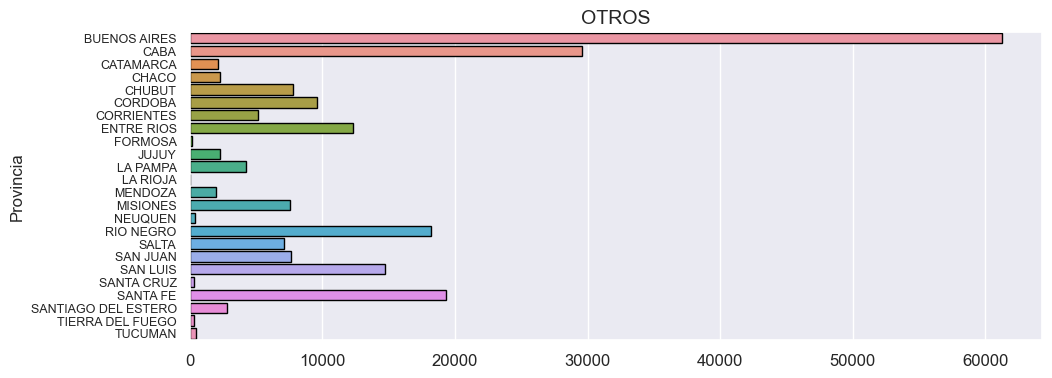

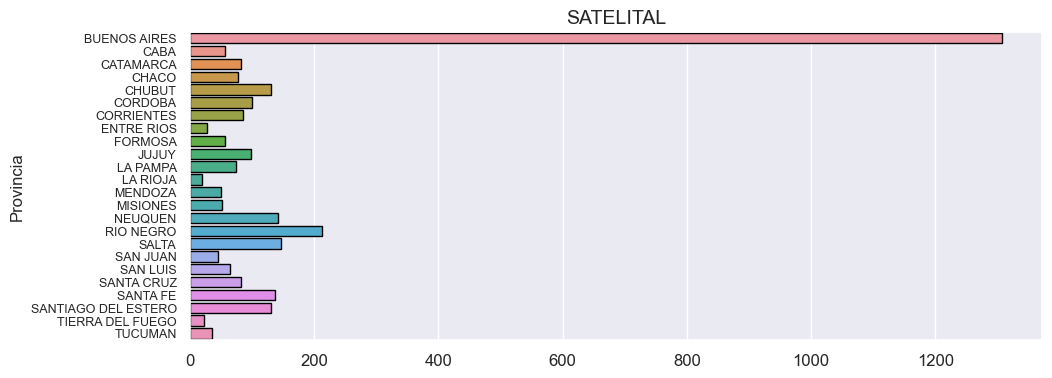

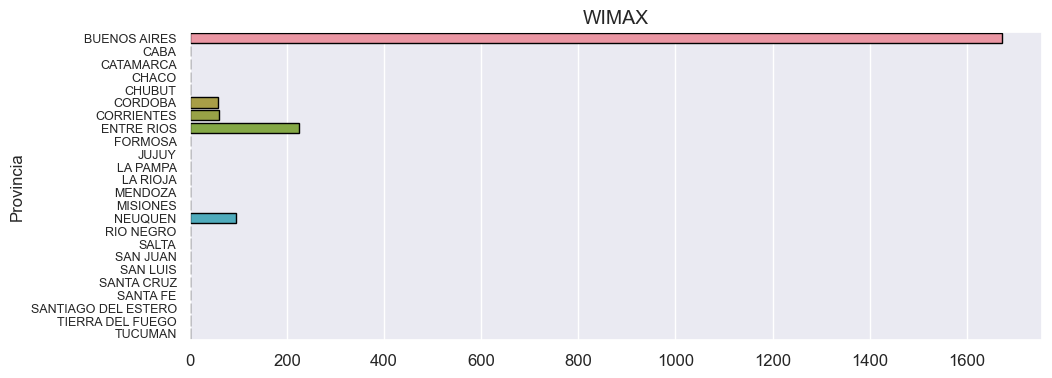

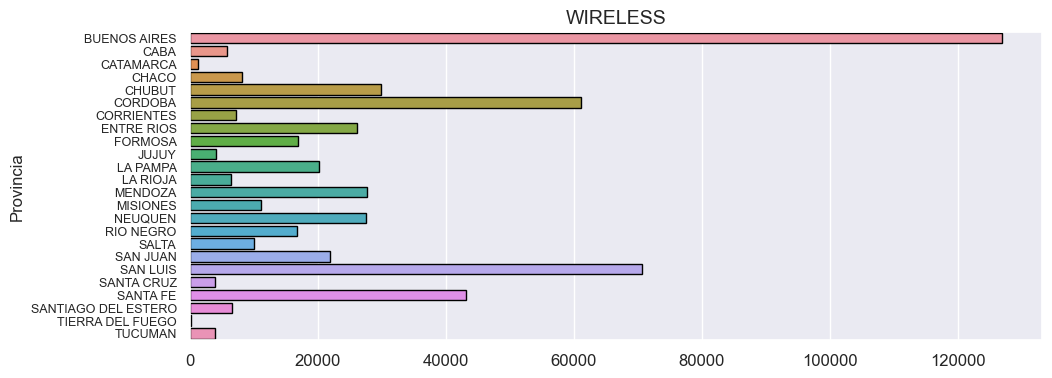

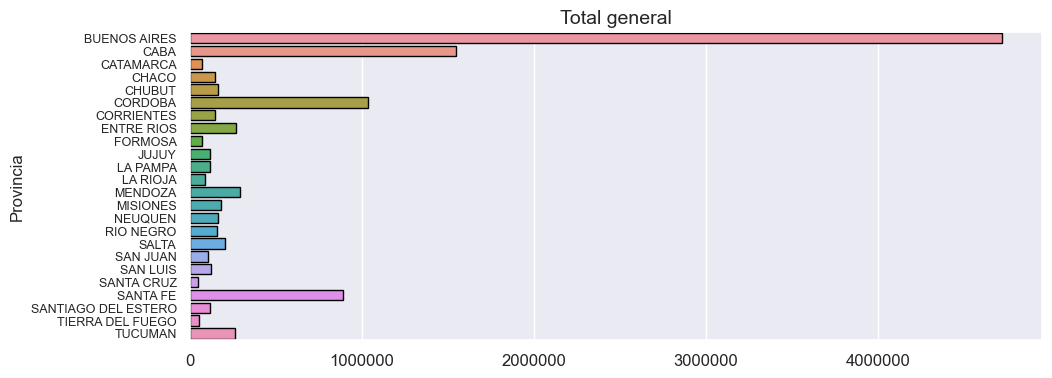

In [177]:
data = internet_fijo_tech_localidades.groupby(by='Provincia').sum().reset_index()
for col in columns:
    plt.figure(figsize=(11,4))
    sns.barplot(data = data, x=col,y='Provincia', edgecolor='black')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=9)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel('')
    plt.title(col, fontsize=14)
    plt.show()

In [180]:
data.head(1)

,Provincia,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,339648,2748325,6199,1436433,61238,1307,1672,126846,4721668


In [197]:
provincias = data.Provincia.unique()
provincias

array(['BUENOS AIRES', 'CABA', 'CATAMARCA', 'CHACO', 'CHUBUT', 'CORDOBA',
       'CORRIENTES', 'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA',
       'LA RIOJA', 'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA',
       'SAN JUAN', 'SAN LUIS', 'SANTA CRUZ', 'SANTA FE',
       'SANTIAGO DEL ESTERO', 'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

In [264]:
def tecnologias_por_provincia(provincia):
    plt.figure(figsize=(15, 6))
    sns.barplot(data=data[data.Provincia == provincia])
    plt.title(f'Tecnologias actuales de la provincia de {provincia}', fontsize=16)
    plt.ylabel('Cantidad de accesos', fontsize=13)
    plt.show()

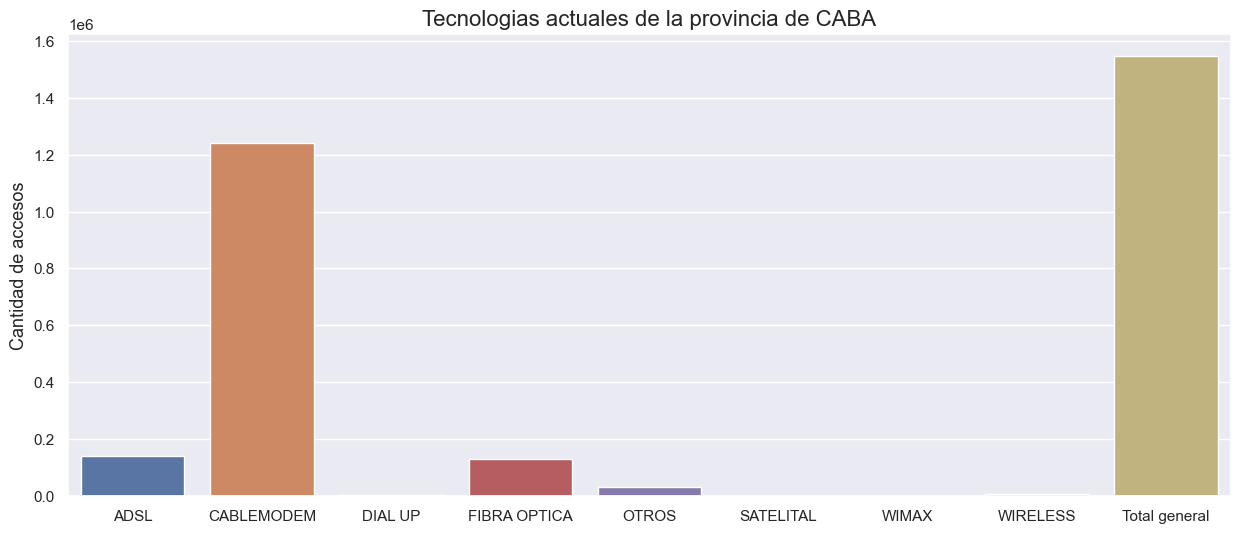

In [265]:
tecnologias_por_provincia('CABA')

In [206]:
def tecnologias_por_provincia(provincia):
    plt.figure(figsize=(15,6))
    sns.barplot(data = data[data.Provincia == provincia])
    plt.title(f'Tecnologias actuales de la provinciaincia {provincia}', fontsize=16)
    plt.ylabel('Cantidad de accesos', fontsize=13)
    plt.show()

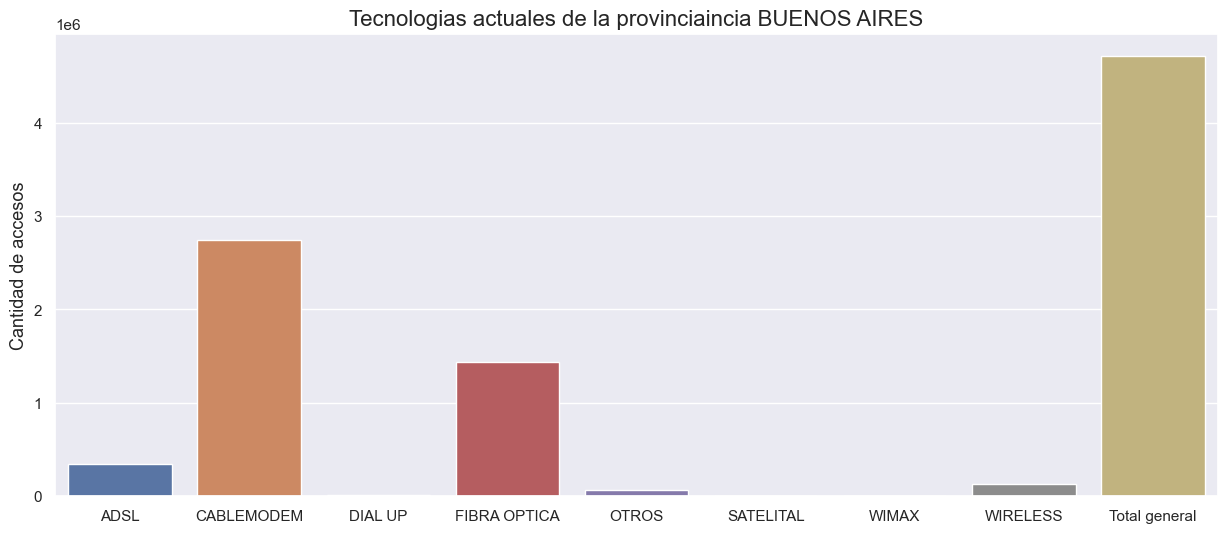

In [207]:
tecnologias_por_provincia('BUENOS AIRES')

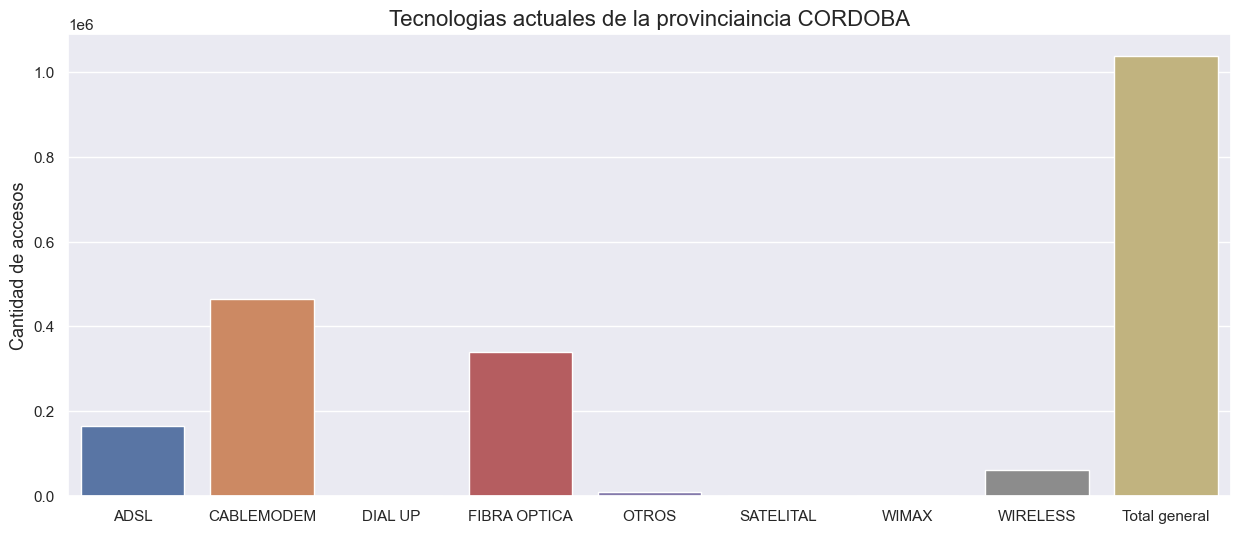

In [208]:
tecnologias_por_provincia('CORDOBA')

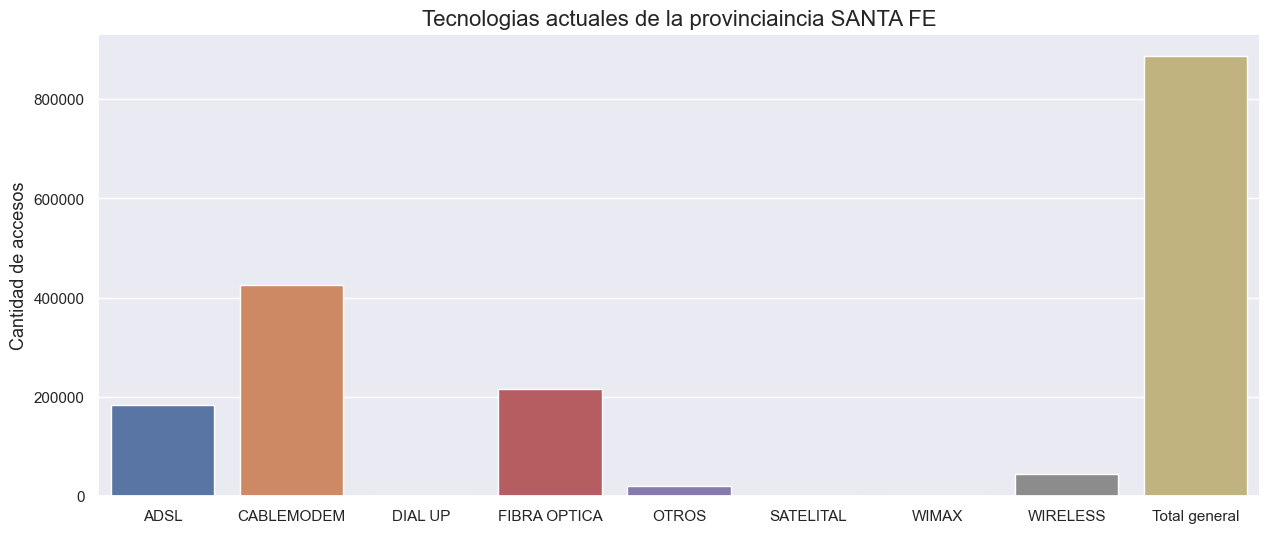

In [209]:
tecnologias_por_provincia('SANTA FE')

In [57]:
df = pd.read_csv('original_datasets\internet_vel_bajada_localidades.csv')
df[columns].sum(axis=1)

0       9.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
3093    0.0
3094    0.0
3095    0.0
3096    0.0
3097    0.0
Length: 3098, dtype: float64

In [58]:
columns = ['Otros',
       '0,256 mbps', '0,375 mbps', '0,5 mbps', '0,512 mbps', '0,625 mbps',
       '0,75 mbps', '1 mbps', '1,25 mbps', '1,5 mbps', '2 mbps', '2,2 mbps',
       '2,5 mbps', '3 mbps', '3,3 mbps', '3,5 mbps', '4 mbps', '4,5 mbps',
       '5 mbps', '6 mbps', '6,4 mbps', '7 mbps', '7,5 mbps', '8 mbps',
       '9 mbps', '10 mbps', '11 mbps', '12 mbps', '13 mbps', '14 mbps',
       '15 mbps', '16 mbps', '17 mbps', '18 mbps', '19 mbps', '20 mbps',
       '21 mbps', '22 mbps', '23 mbps', '24 mbps', '25 mbps', '25,1 mbps',
       '25,11 mbps', '25,5 mbps', '26 mbps', '30 mbps', '31 mbps', '32 mbps',
       '34 mbps', '35 mbps', '36 mbps', '38 mbps', '39 mbps', '40 mbps',
       '41 mbps', '45 mbps', '46 mbps', '49 mbps', '50 mbps', '55 mbps',
       '58 mbps', '59 mbps', '60 mbps', '61 mbps', '62 mbps', '64 mbps',
       '65 mbps', '66 mbps', '70 mbps', '75 mbps', '78 mbps', '80 mbps',
       '82 mbps', '83 mbps', '85 mbps', '90 mbps', '92 mbps', '95 mbps',
       '100 mbps']

In [61]:
for c in columns:
    df[c] = df[c].astype(str).str.replace(',','.').astype(float)

<AxesSubplot: xlabel='Provincia'>

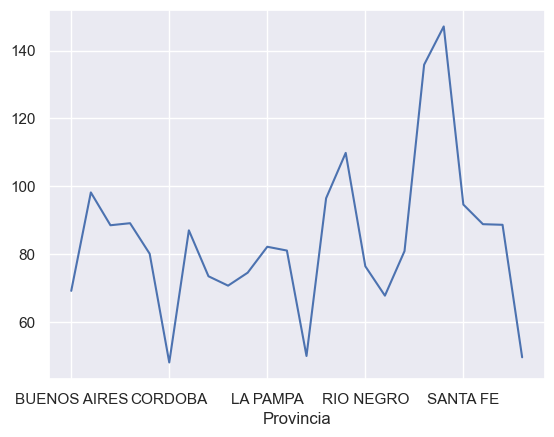

In [71]:
df.groupby(by='Provincia').mean().mean(axis=1).plot()

In [8]:
df = pd.read_csv('original_datasets/historico_velocidad_internet_provincias.csv')
df

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,3,NaN,NaN
836,2014,1,Santa Fe,3,NaN,NaN
837,2014,1,Santiago Del Estero,3,NaN,NaN
838,2014,1,Tierra Del Fuego,3,NaN,NaN
